In [6]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.renderefd{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
# 한글설정
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지 (font_맑은고딕만 설정하면 -깨짐)
# plt.rc('font', family='AppleGothic') # Mac
# plt.rcParams['font.family'] = 'Malgun Gothic' # 한글설정 방법 2.
# warning(경고) 안보이게

<font size="5" color="red">ch12. 데이터시각화 </font>
- 시각화 라이브러리 : matplotlib, seaborn, folium(지도 시각화)
  * matplotlib : 파이썬에서 가장 쉽고 많이 쓰는 시각화 라이브러리. 판다스 내부에 포함
  * seaborn : matplotlib기반으로 다양한 색, 테마, 차트 기능과 groupby
 
 # 2절 seaborn
     - 공식사이트 : https://seaborn.pydata.org
     - seaborn API : https://seaborn.pydata.org/api.html
- seaborn으로 그래프 그리기 위해 다음 단계 따릅니다.
    1. 데이터 준비
    2. 미적 속성 설정(한글 설정 다시)
    3. 함수를 이용해서 그래프 그리기(수치형, 범주형, 쌍 관계, 밀도, 회귀, 다중그래프)
    4. 그래프 출력(show), 저장(savefig)

In [10]:
iris = sns.load_dataset('iris')
iris.shape

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
species         150
dtype: int64

In [8]:
iris.species.unique() # 범주형 데이터들의 종류

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [16]:
iris['species'].value_counts() # 범주별 데이터 개수
iris.groupby('species')['sepal_length'].count()

species
setosa        50
versicolor    50
virginica     50
Name: sepal_length, dtype: int64

In [18]:
titanic = sns.load_dataset('titanic')
# Survived - 생존유무, target 값. (0 = 사망, 1 = 생존)
# Name - 탑승객 성명
# Pclass - 티켓 클래스. (1 = 1st, 2 = 2nd, 3 = 3rd)
# Sex - 성별
# Age - 나이(세)
# SibSp - 함께 탑승한 형제자매, 배우자 수 총합
# Parch - 함께 탑승한 부모, 자녀 수 총합
# Embarked - 탑승 항구
# Fare - 탑승 요금
# Ticket - 티켓 넘버
# Cabin - 객실 넘버
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [20]:
titanic.shape

(891, 15)

In [22]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [23]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## 2.2 미적 속성 설정하기(style, context, palette, figsize...)
### 1) 그래프 style 설정

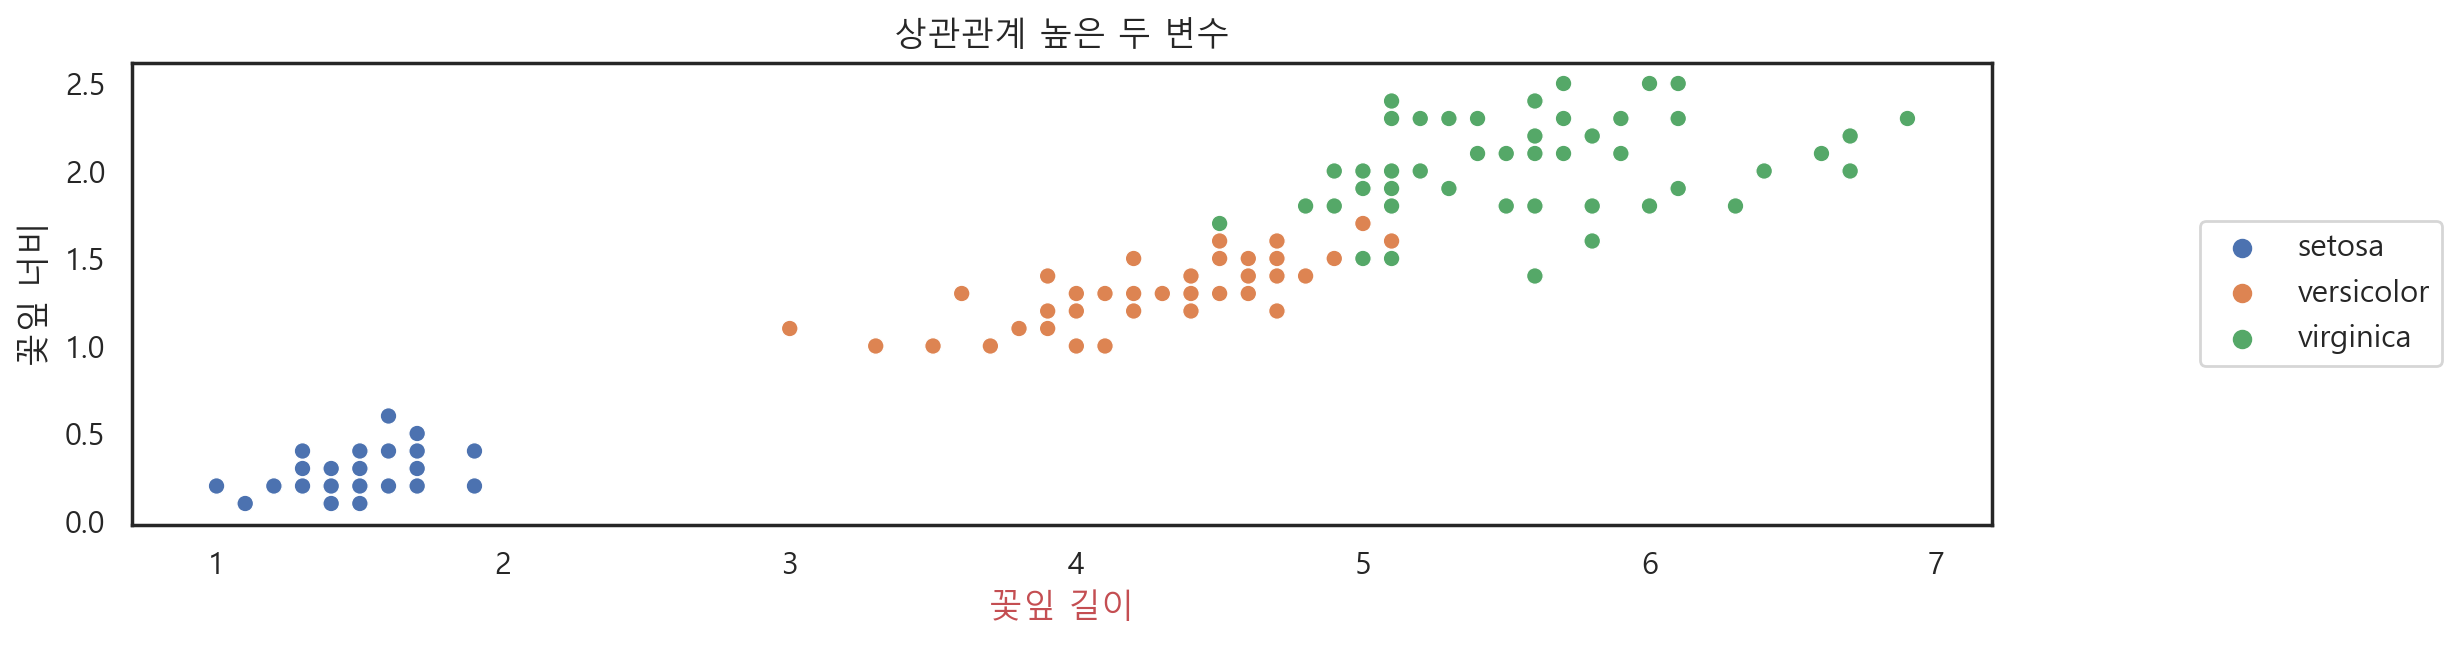

In [44]:
# 범례사용 https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot
plt.figure(figsize=(12,3))
sns.set(style='white') # white, whitegrid, dark, darkgrid, ticks
# 한글설정
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지 (font_맑은고딕만 설정하면 -깨짐)

ax = sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species')
ax.set(title="상관관계 높은 두 변수",
      ylabel='꽃잎 너비')
ax.set_xlabel('꽃잎 길이', color='r')
ax.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.show()

### 2) 컨텍스트 지정(비율)

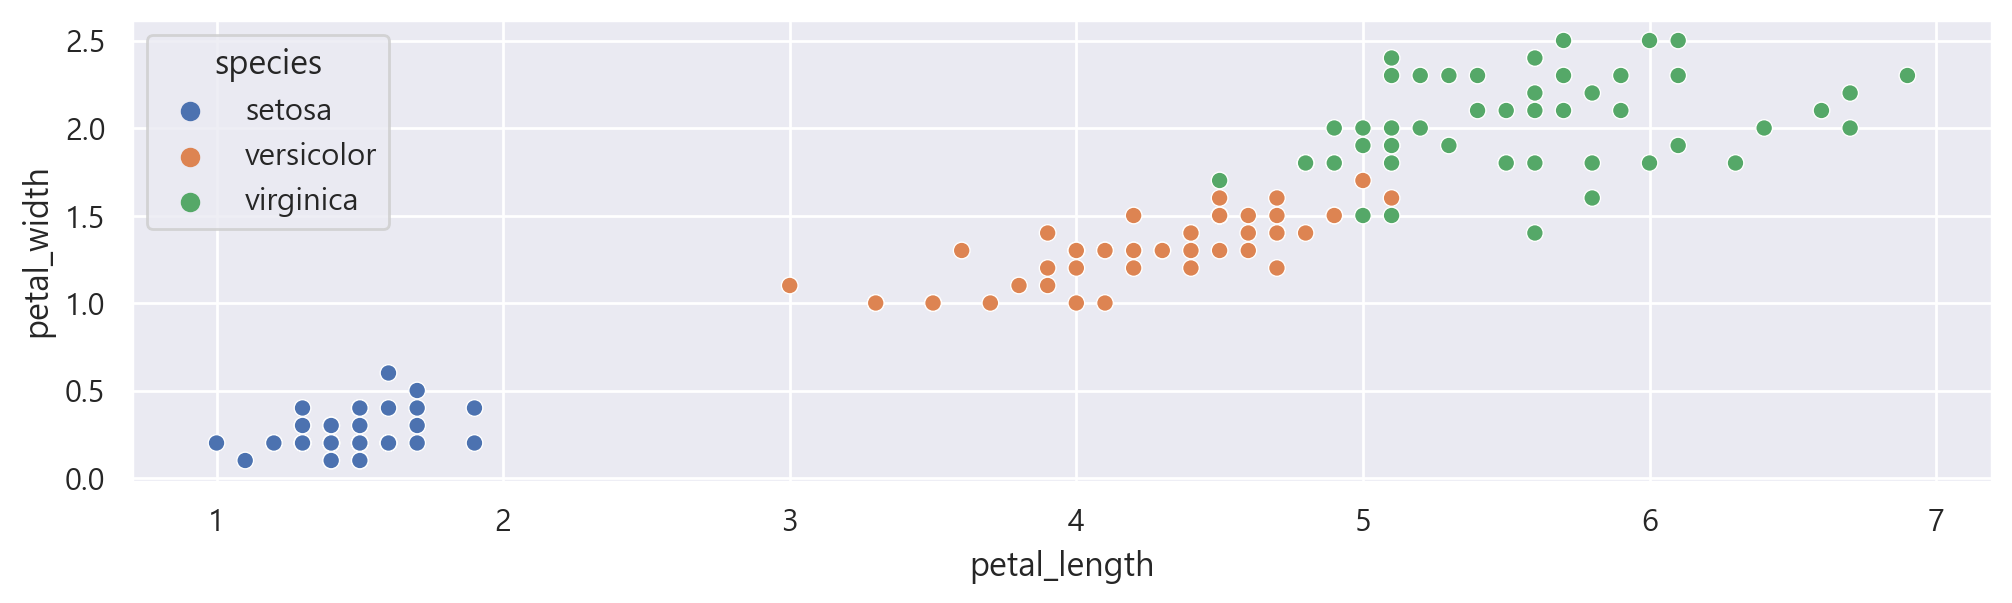

In [46]:
plt.figure(figsize=(12,3))
sns.set(context='notebook') # notebook(1.0), paper(0.8), talk(1.3), poster(1.8)
# 한글설정
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지 (font_맑은고딕만 설정하면 -깨짐)

sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species')
plt.show()

### 3) 컬러 팔레트
- https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette
- https://matplotlib.org/tutorials/colors/colormaps.html
- https://seaborn.pydata.org/tutorial/color_palettes.html

In [47]:
sns.set(palette='Set1')

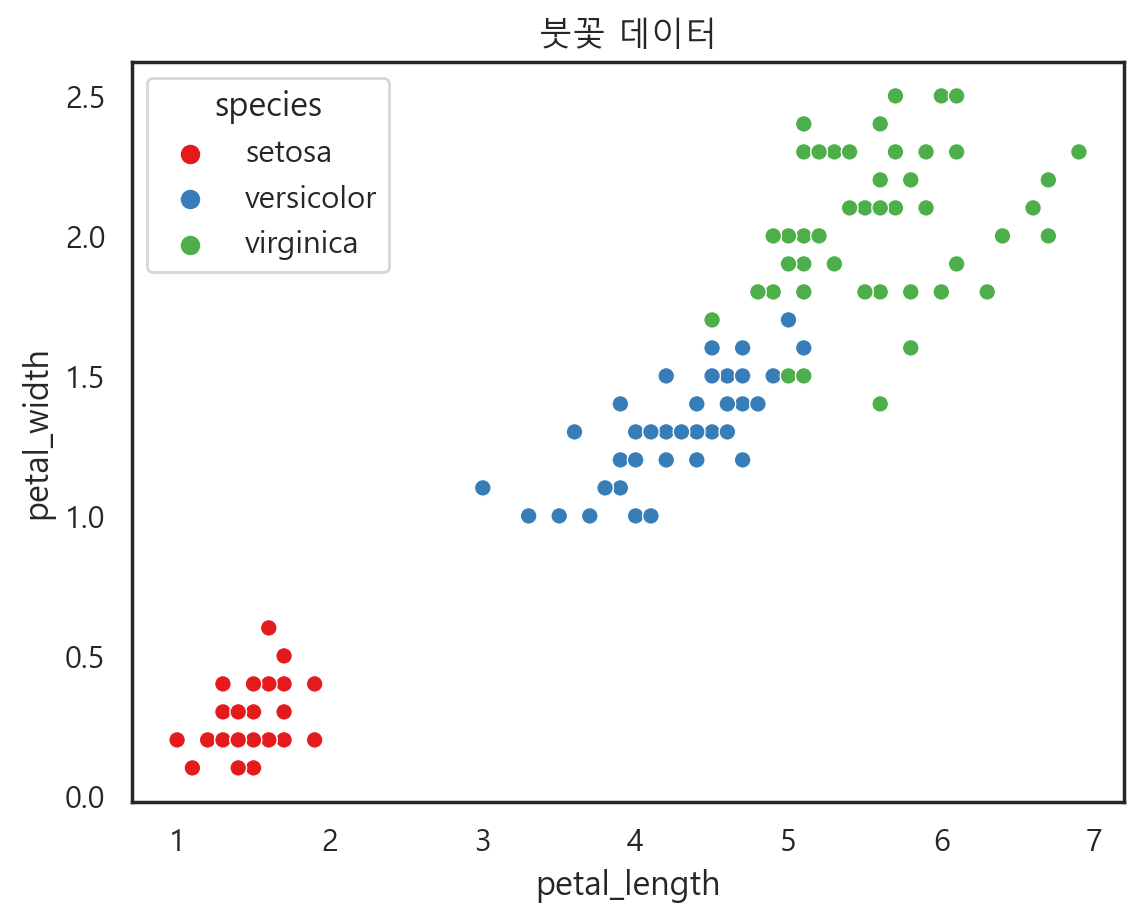

In [54]:
sns.set(palette="Pastel1", style="white", context="notebook") # 기본 미적 속성 설정
# 한글설정
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지 (font_맑은고딕만 설정하면 -깨짐)
ax = sns.scatterplot(data=iris, x='petal_length', y='petal_width',
               hue='species', palette="Set1")
ax.set_title('붓꽃 데이터')
plt.show()

In [55]:
sns.set(palette="Dark2", 
        style="whitegrid", 
        context="notebook",
       rc={'figure.figsize':(10,3)}) # 기본 미적 속성 설정
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지 (font_맑은고딕만 설정하면 -깨짐)


## 2.3 Seaborn 함수로 그래프 그리기
### 1) 관계형 그래프
    - x축이 수치형 데이터
   ex) scatterplot, lineplot => relplot(서브플롯)

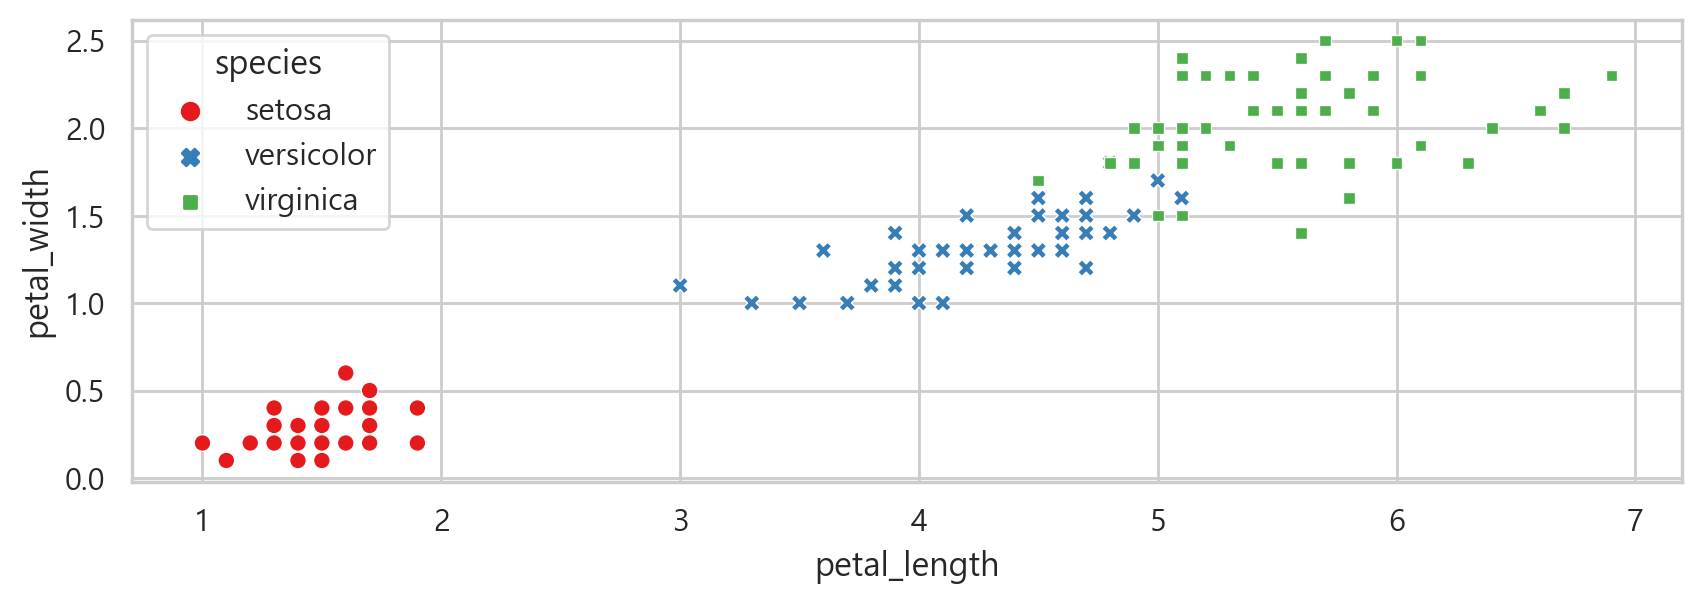

In [58]:
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species',
               palette='Set1', style='species')
        # species 별 색상과 스타일이 다른 scatterplot
plt.show()

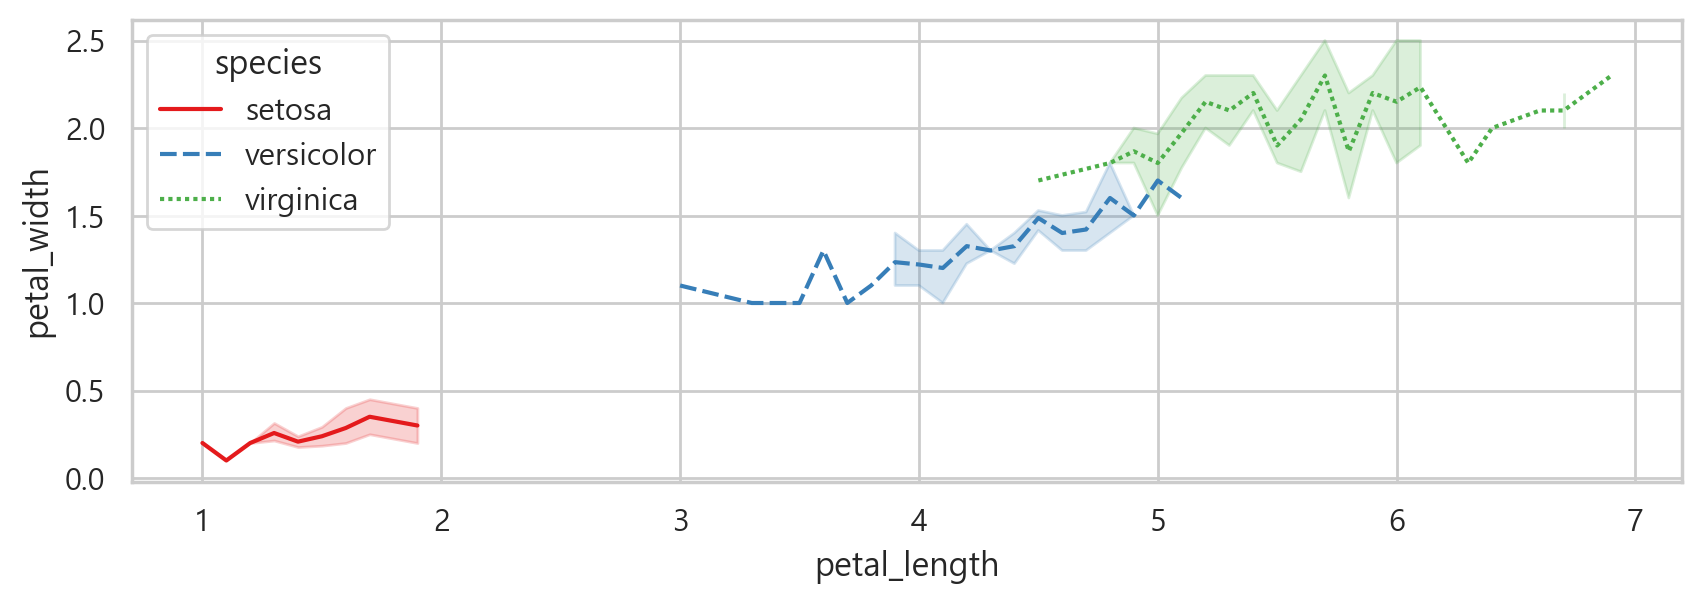

In [64]:
# 종별 lineplot 한 그래프에 나타냄
# lineplot 의 음영 : 95% 신뢰 구간
sns.lineplot(data=iris, x='petal_length', y='petal_width',
            hue='species', palette='Set1', style='species')
plt.show()

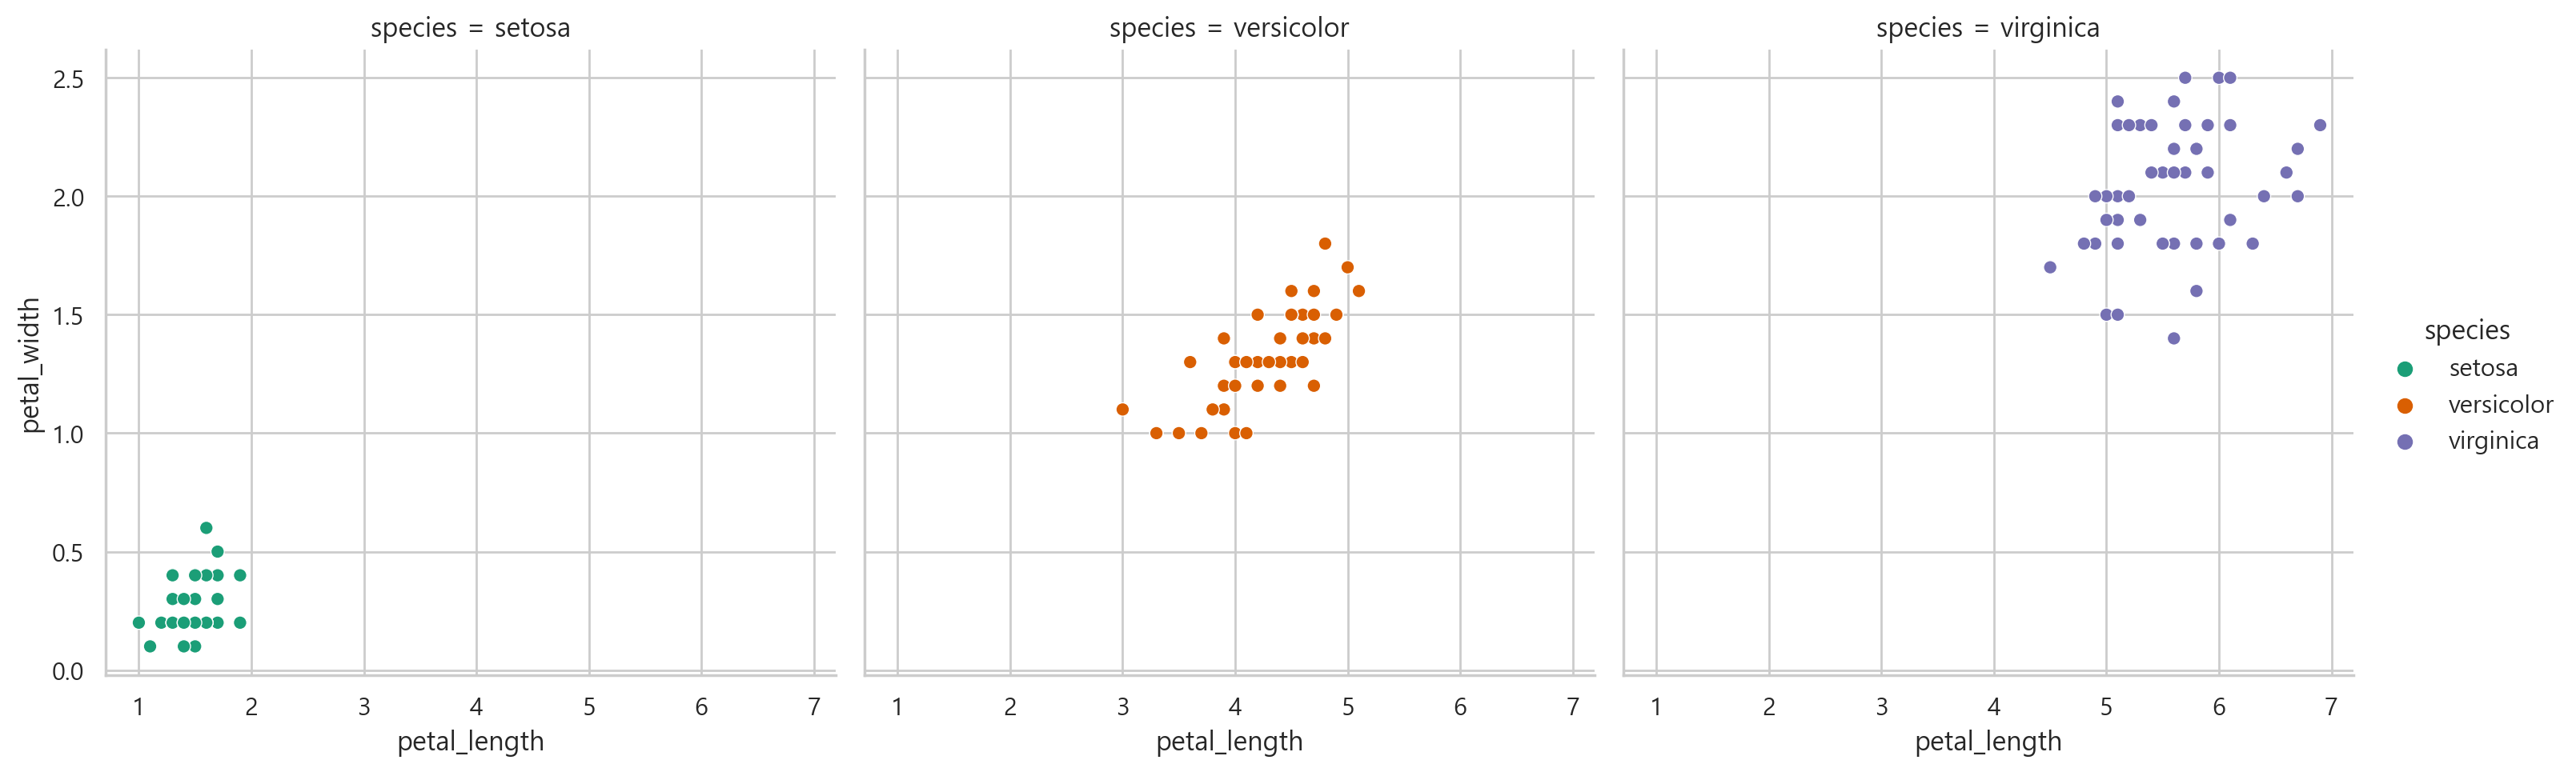

In [70]:
# 종별 lineplot을 서브플롯으로 
sns.relplot(data=iris, x='petal_length', y='petal_width',
           hue='species', 
#             kind='line', # kind='scatter' 가 기본값
           col='species', # species 별 서브플롯
#             col_wrap=2, # 한줄에 표현될 서브플롯 수
           )

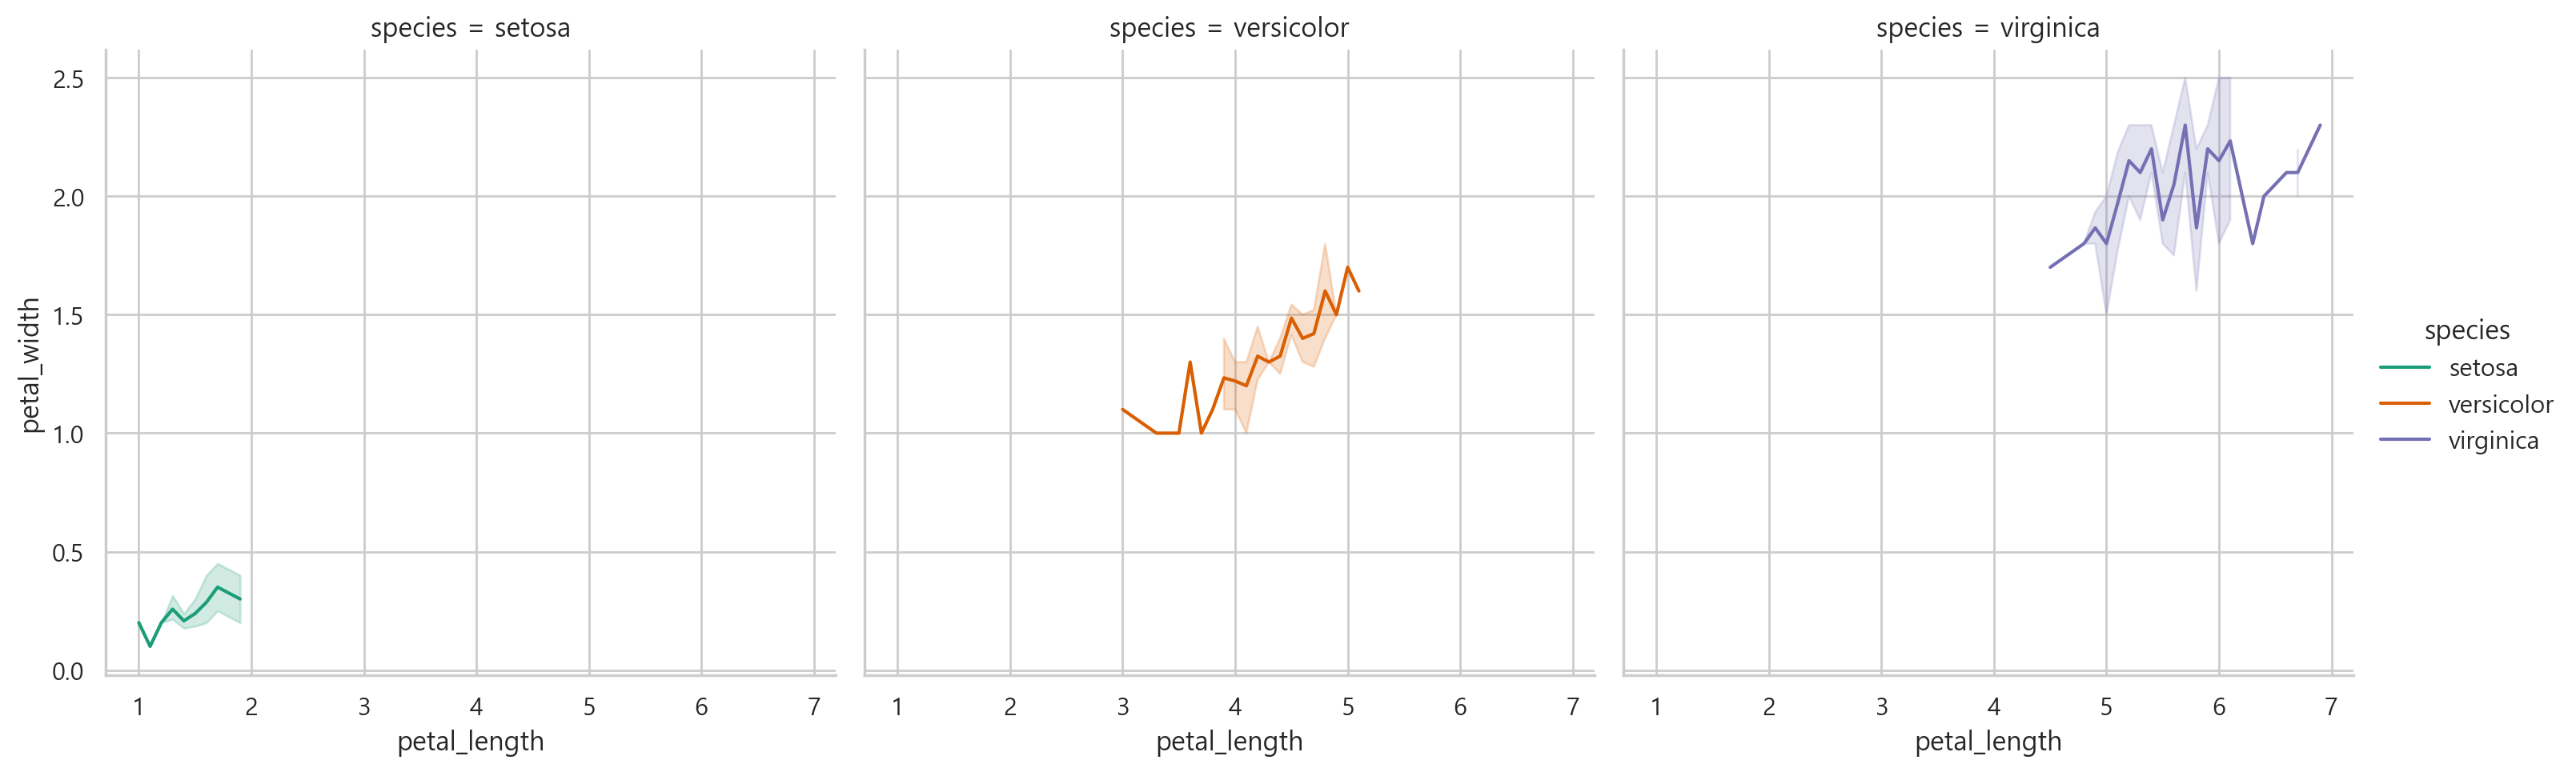

In [72]:
sns.relplot(data=iris, x='petal_length', y='petal_width',
           hue='species', 
            kind='line', # kind='scatter' 가 기본값
           col='species', # species 별 서브플롯
#             col_wrap=2, # 한줄에 표현될 서브플롯 수
           )

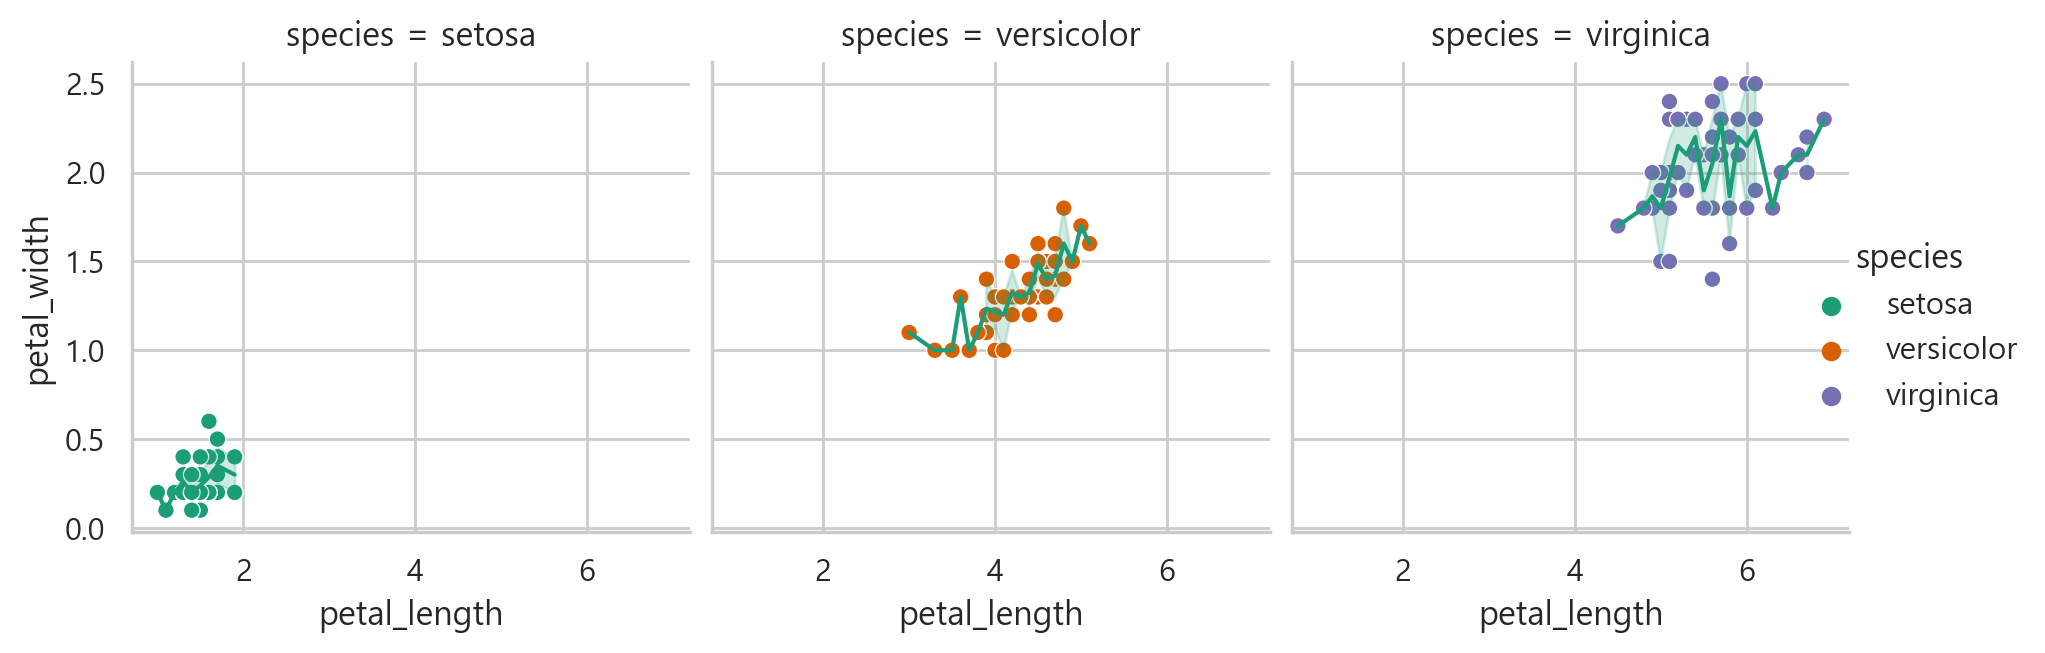

In [76]:
# line과 scatter를 종별 서브플롯으로 겹쳐서 
g = sns.relplot(data=iris, x='petal_length', y='petal_width',
           hue='species', 
#            kind='line', # kind='scatter' 가 기본값
           col='species', # species 별 서브플롯
#             col_wrap=2, # 한줄에 표현될 서브플롯 수
           )
# g그래프에 line플롯을 추가
g.map_dataframe(sns.lineplot, x='petal_length', y='petal_width')
# 크기 조정 : 서브플롯 함수에서는 내부적으로 figure 새로 만들기 때문에 figsize 무시
g.fig.set_size_inches(10,3)

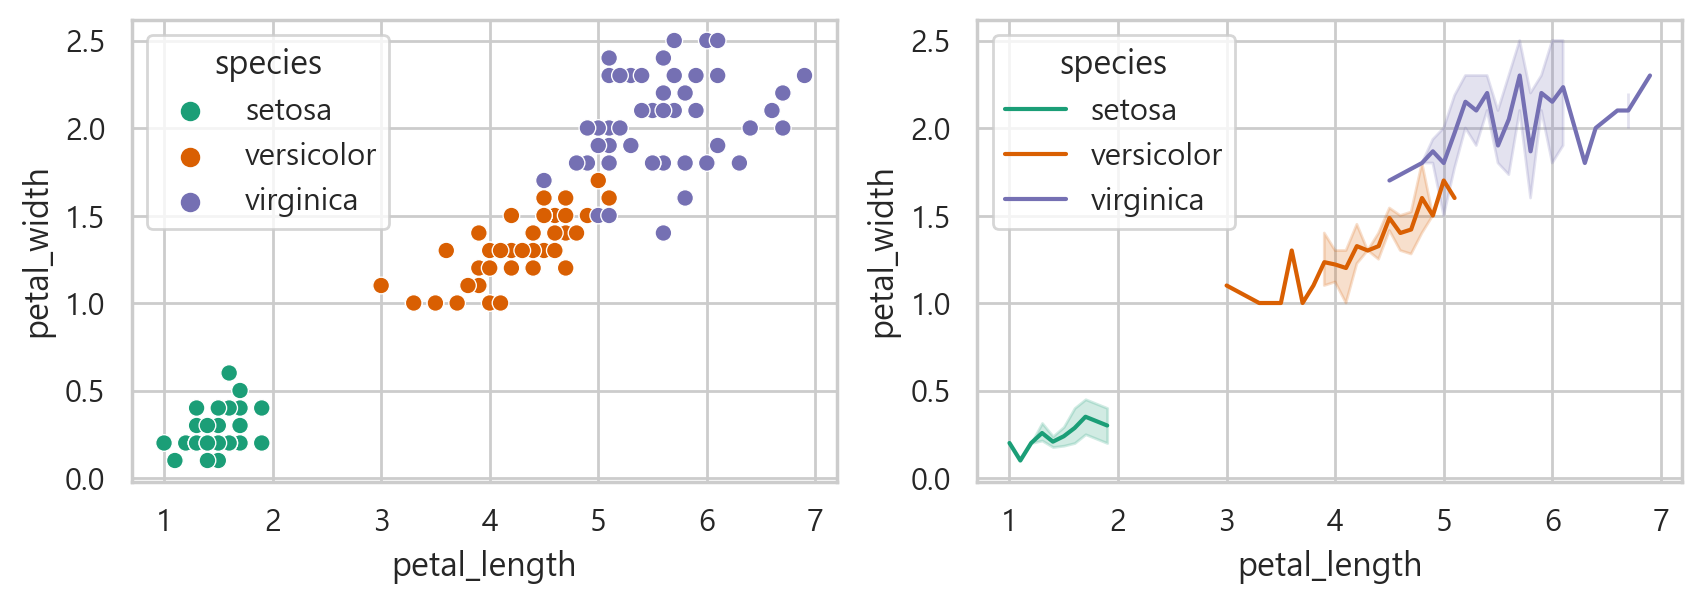

In [77]:
# ax[0]에는 scatter, ax[1] lineplot
fig, ax = plt.subplots(1, ncols=2)
sns.scatterplot(data=iris, 
                x='petal_length', 
                y='petal_width', 
                hue='species', 
                ax=ax[0])
sns.lineplot(data=iris, 
            x='petal_length', 
            y='petal_width', 
            hue='species',
            ax=ax[1])
plt.show()

### 2) 범주형 그래프
    - x축이 범주형 데이터
(ex) stripplot(무작위 흩뿌림), swarmplot(겹치지않는 산점도)
     barplot, barhplot(y의 평균으로 막대그래프), pointplot(y의 평균으로 line)
     countplot(count는 x의 빈도수가 높이)
         boxplot, violinplot, boxenplot
         => catplot(서브플롯)

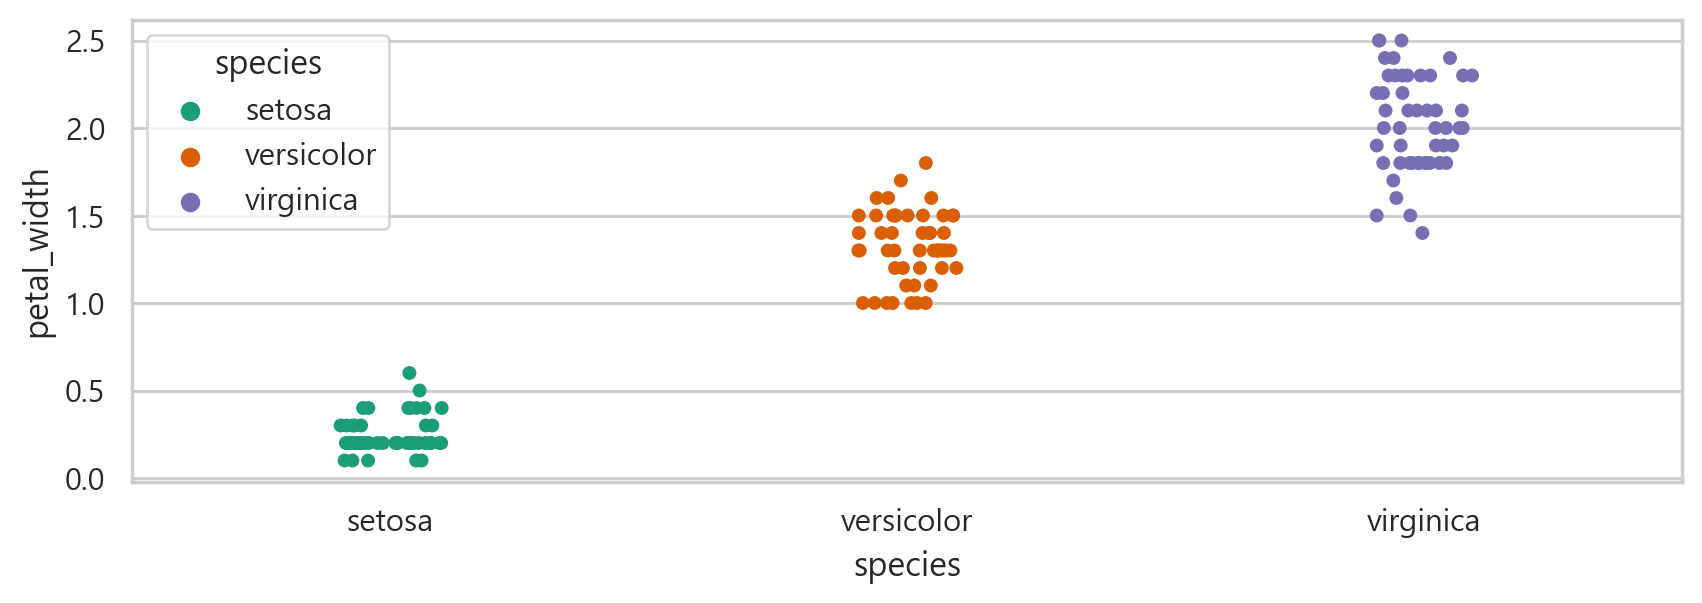

In [79]:
# x축이 범주형일 때의 산점도
sns.stripplot(data=iris, x='species', y='petal_width', hue='species')
plt.show()

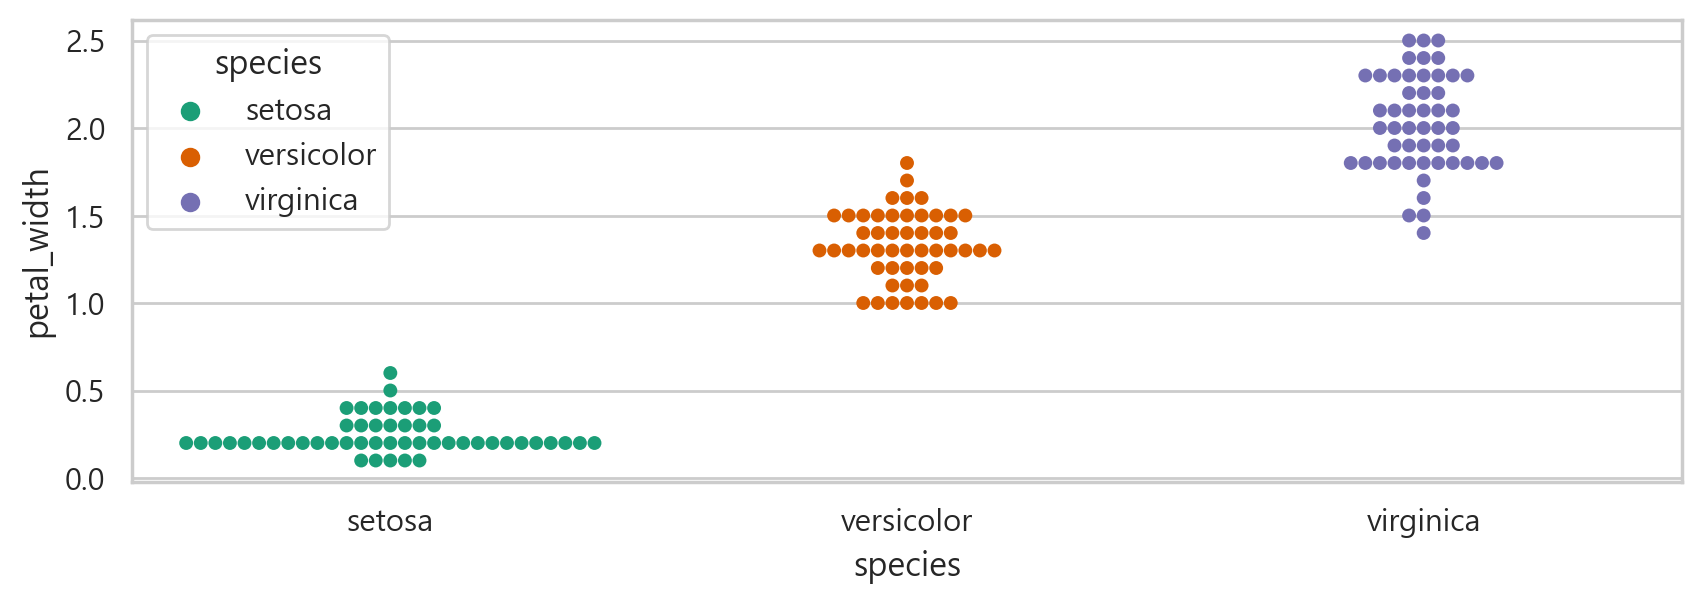

In [80]:
# x 축이 범주형일 때의 산점도 (분포 포함)
sns.swarmplot(data=iris, x='species', y='petal_width', hue='species')
plt.show()

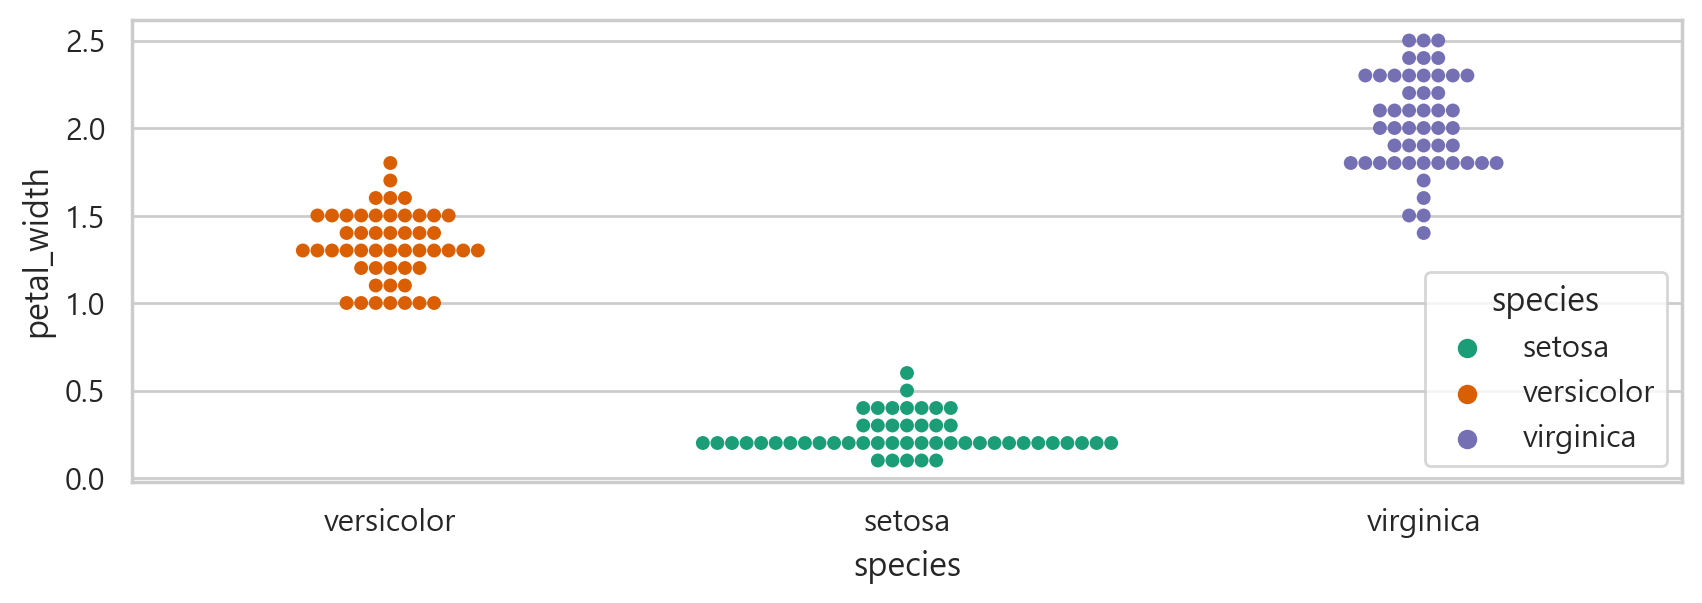

In [82]:
# 범주형 그래프의 x축을 지정하지 않으면
sns.swarmplot(data=iris,
             x='species',
             y='petal_width',
             hue='species',
             order=['versicolor', 'setosa', 'virginica'])
plt.show()

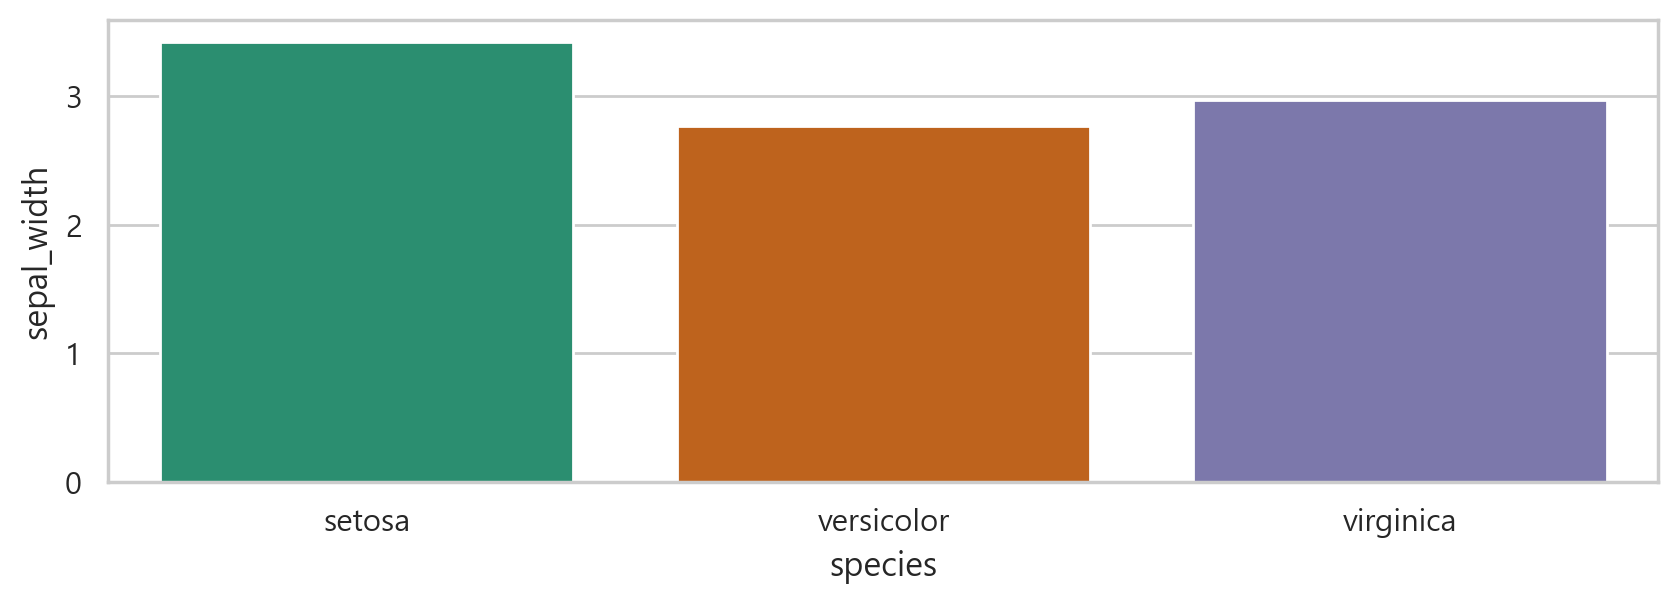

In [84]:
# barplot, barhplot, pointplot : 각 범주별 평균값(y)과 그에 대한 신뢰구간
            # 신뢰구간 제외 : errorbar = None
sns.barplot(data=iris, x='species', y='sepal_width',
           errorbar=None)
sns.lineplot(data=iris, x='species', y='petal_Width', color='k')
plt.show()

<Axes: xlabel='species', ylabel='petal_width'>

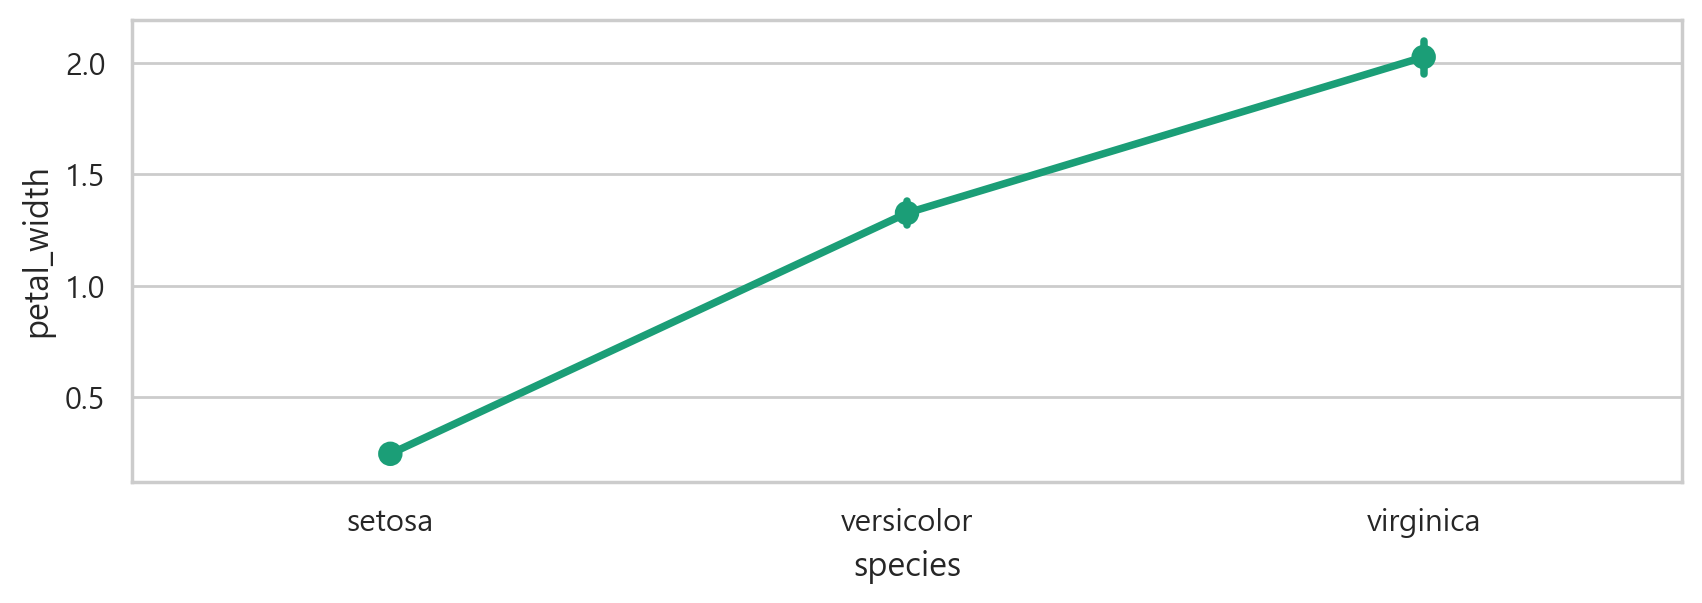

In [85]:
sns.pointplot(data=iris, x='species', y='petal_width',
             # errorbar = none
             )

In [91]:
titanic.dtypes.head(3)
titanic.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


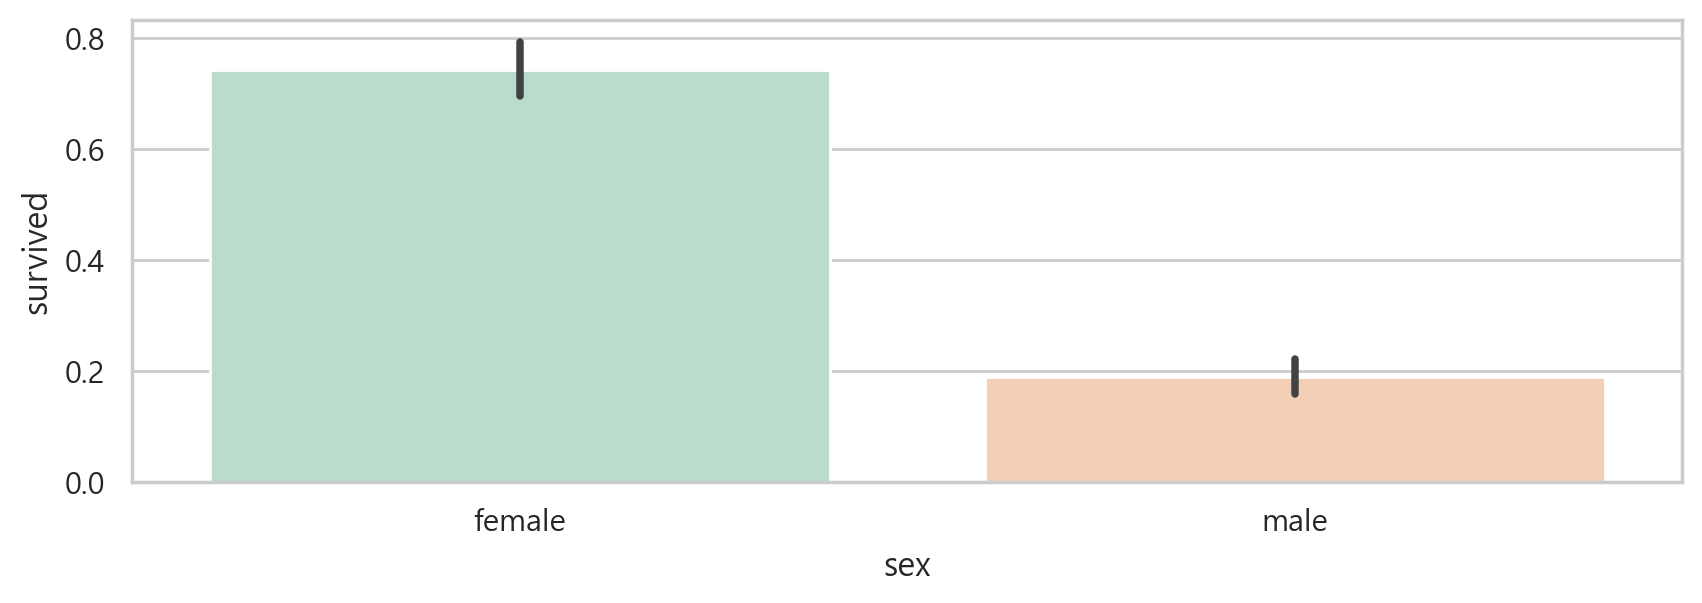

In [90]:
# 성별 생존율을 막대그래프
sns.barplot(data=titanic,
           x='sex',
           y='survived',
           order=['female','male'],
           palette='Pastel2')
plt.show()

In [93]:
titanic.sex.value_counts()

male      577
female    314
Name: sex, dtype: int64

In [97]:
# 남자(577) 중 비생존자
len(titanic[(titanic.sex=='male') & (titanic.survived==0)])

468

In [98]:
# 남자(577) 중 생존자
len(titanic[(titanic.sex=='male') & (titanic.survived==1)])

109

In [100]:
# 여자(314) 중 비생존자
len(titanic[(titanic.sex=='female') & (titanic.survived==0)])

81

In [99]:
# 여자(314) 중 생존자
len(titanic[(titanic.sex=='female') & (titanic.survived==1)])

233

In [101]:
titanic.sample(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
770,0,3,male,24.0,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
362,0,3,female,45.0,0,1,14.4542,C,Third,woman,False,NaN,Cherbourg,no,False


In [102]:
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

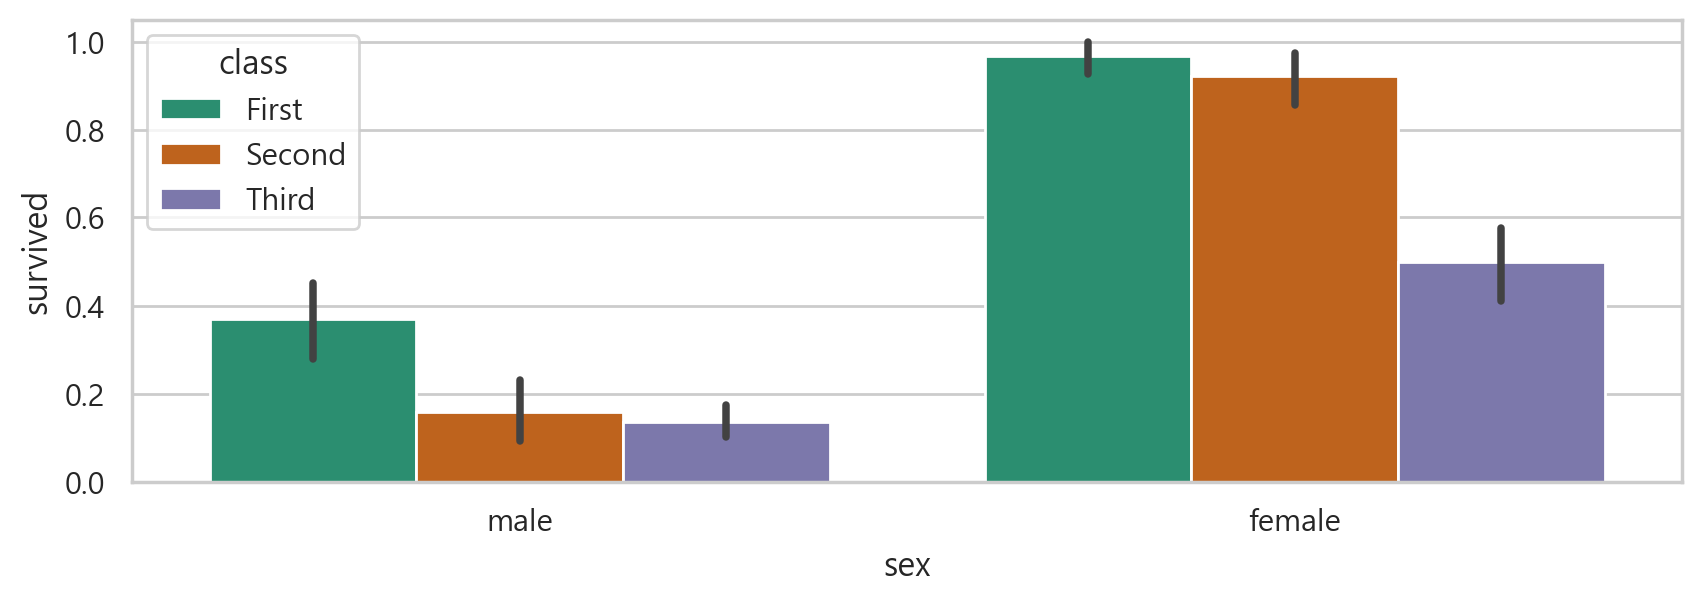

In [105]:
# 성별 생존률 hue='class'
sns.barplot(data=titanic, x='sex', y='survived', hue='class')
plt.show()

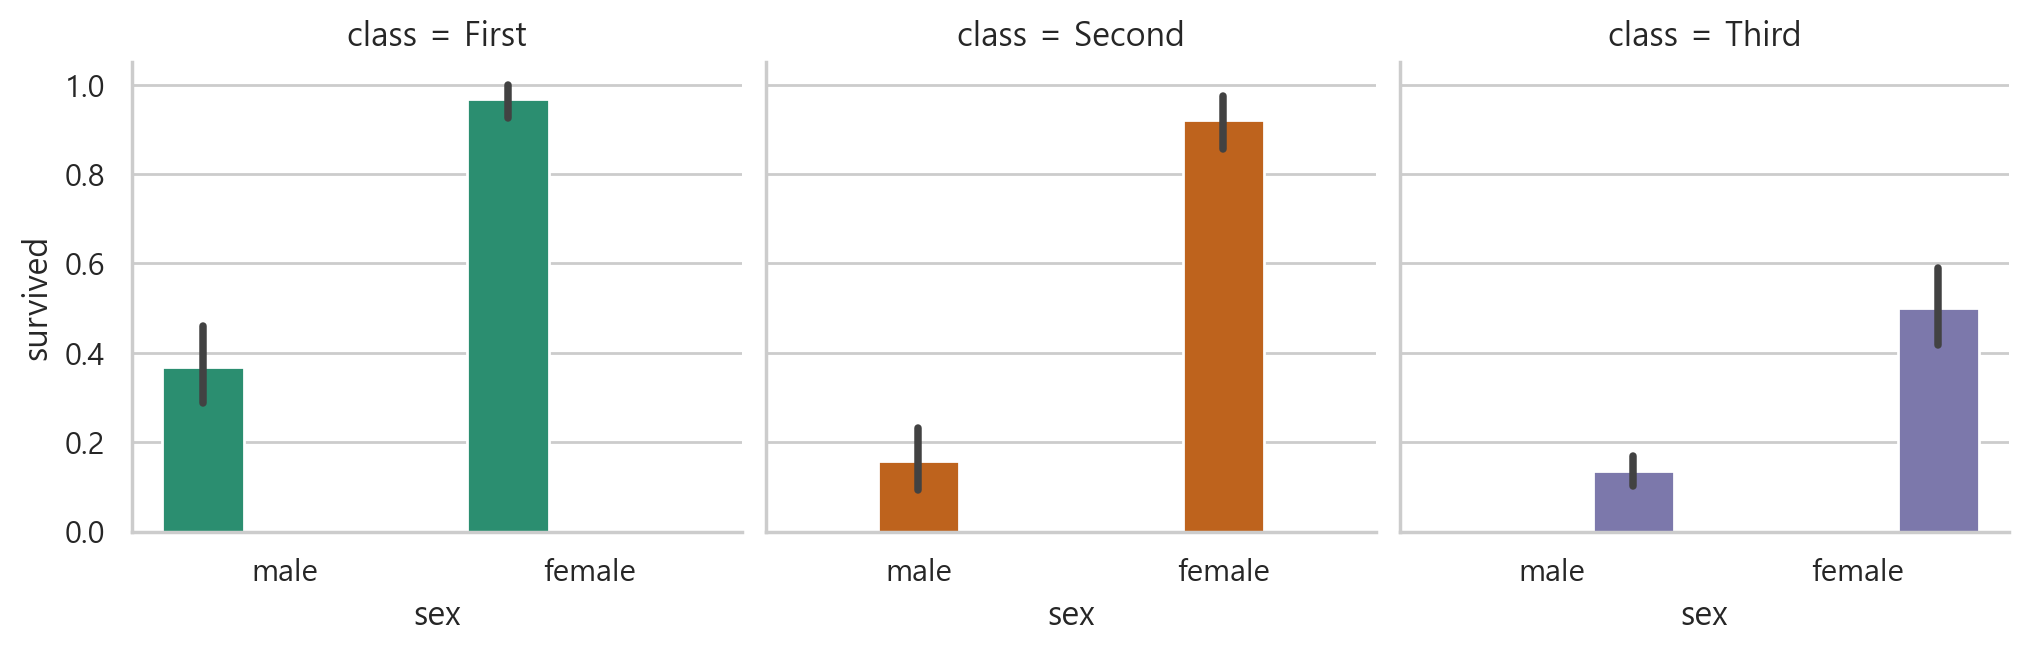

In [114]:
# class 별로 성별 생존률을 서브플롯(막대)
g = sns.catplot(data=titanic,
           x='sex',
           y='survived',
           hue='class',
           kind='bar', # 기본값은 stripplot
           col='class',
#            col_wrap=2, # 한행에 그려질 서브플롯 개수, 기본값은 n
           )
g.fig.set_size_inches(10,3)

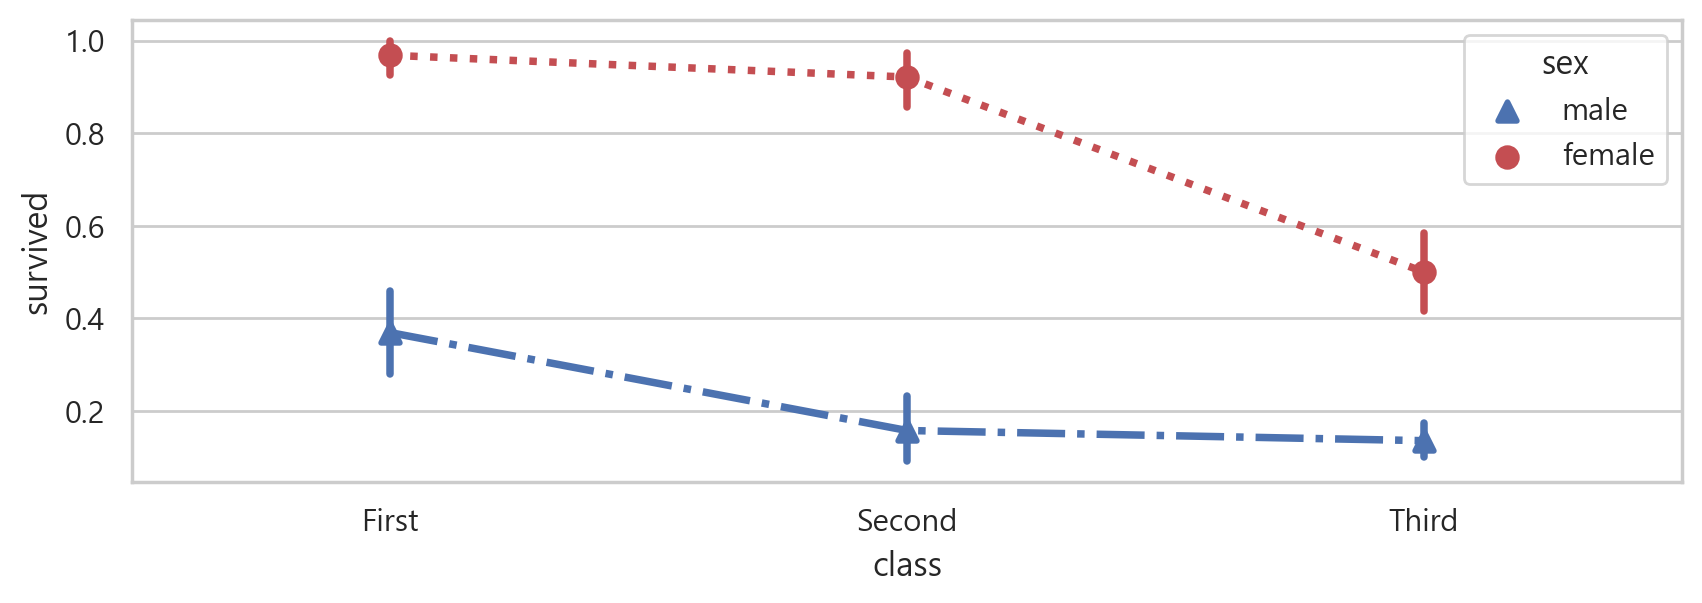

In [120]:
# 성별 생존률 hue='class'
sns.pointplot(data=titanic,
             x='class',
             y='survived',
             hue='sex',
             markers=['^', 'o'],
             linestyles=['-.',':'],
             palette={'male':'b', 'female':'r'})
plt.show()

In [131]:
deck_total_len = len(titanic.deck)
deck_nan_len = titanic.deck.isna().sum()
deck_data_len = deck_total_len - deck_nan_len

print('deck 전체 데이터 개수:{}, 결측치 개수:{}, 데이터개수:{}'.format(deck_total_len,
                                           deck_nan_len,
                                            deck_data_len
                                           )
     )

deck 전체 데이터 개수:891, 결측치 개수:688, 데이터개수:203


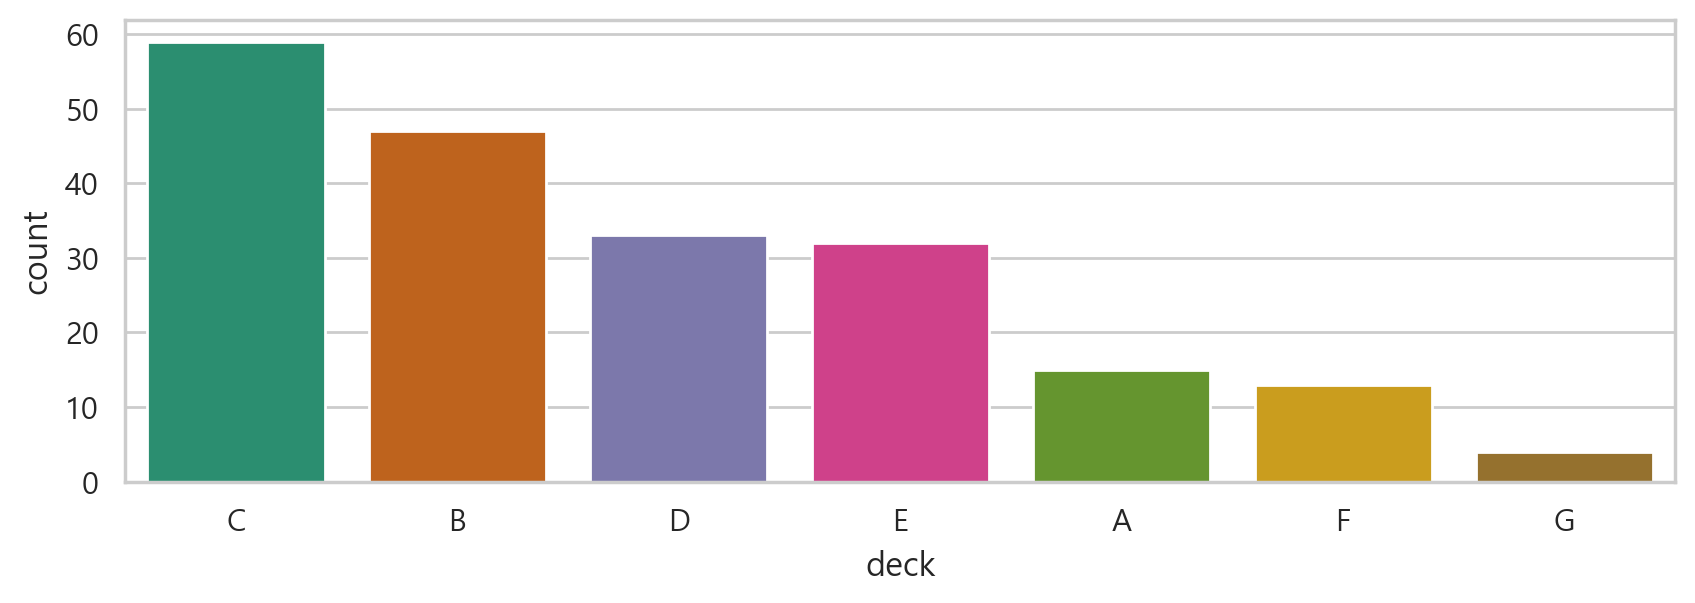

In [172]:
# deck별 개수를 막대그래프(countplot)
deckcnt = titanic.deck.value_counts() # 범주별 데이터 개수(정렬 포함)
sns.countplot(data=titanic,
             x='deck',
            order= deckcnt.index
             )
plt.show()

<Axes: xlabel='sex', ylabel='age'>

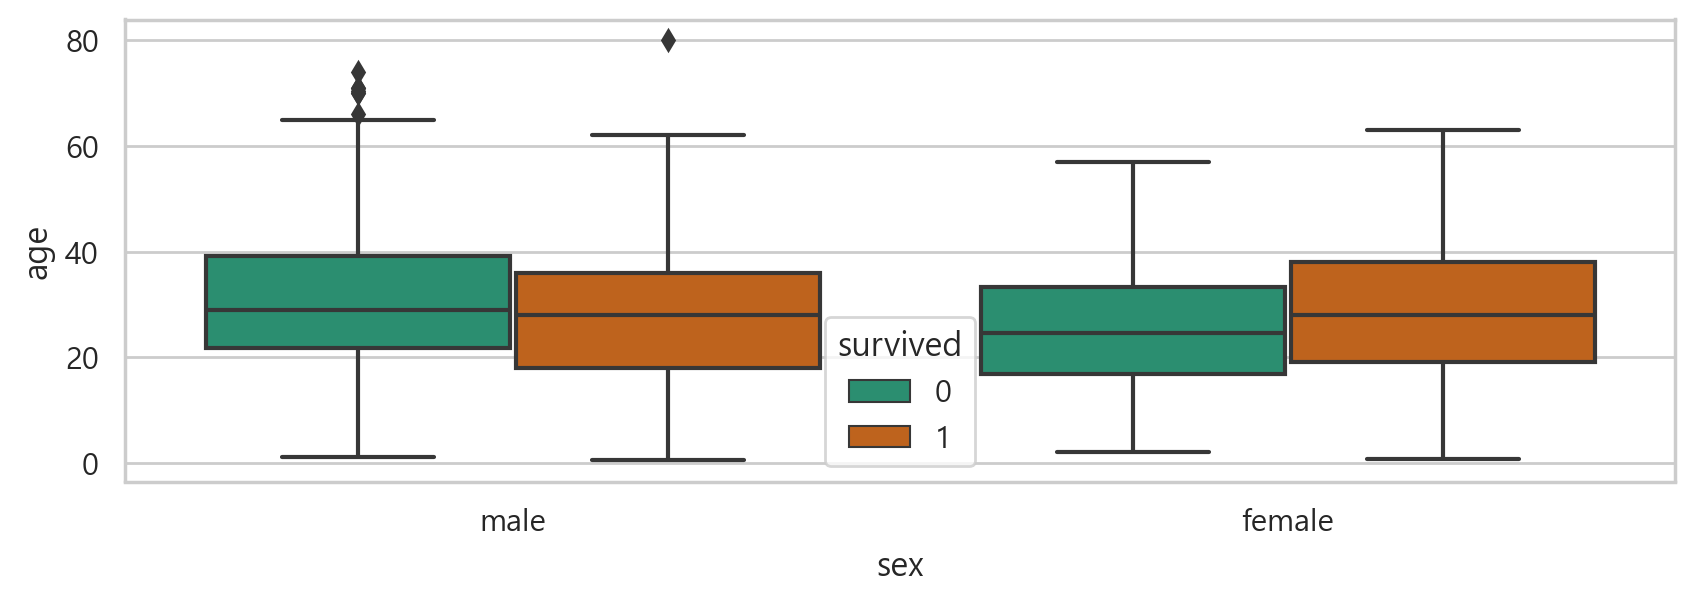

In [173]:
# boxplot
sns.boxplot(data=titanic, x='sex', y='age', hue='survived')

<Axes: xlabel='sex', ylabel='age'>

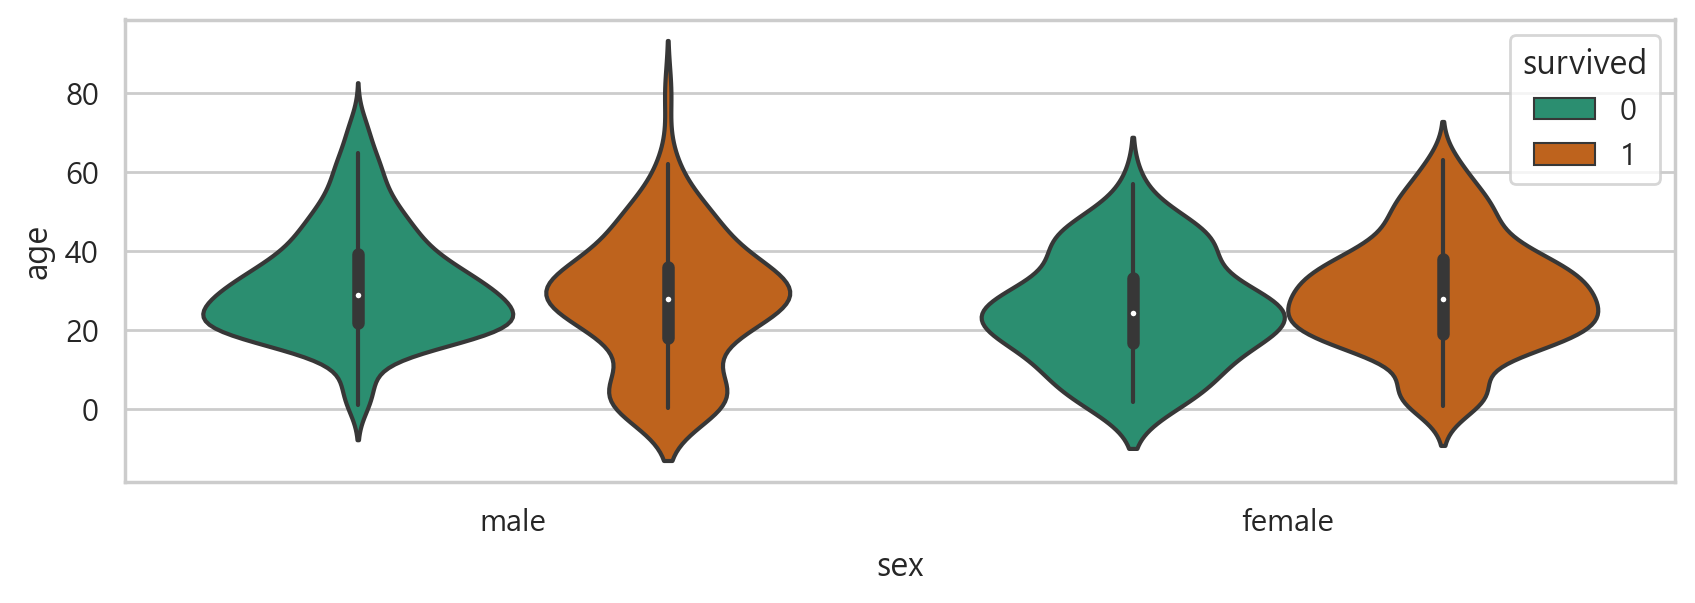

In [174]:
# violinplot
sns.violinplot(data=titanic, x='sex', y='age', hue='survived')

<Axes: xlabel='age', ylabel='sex'>

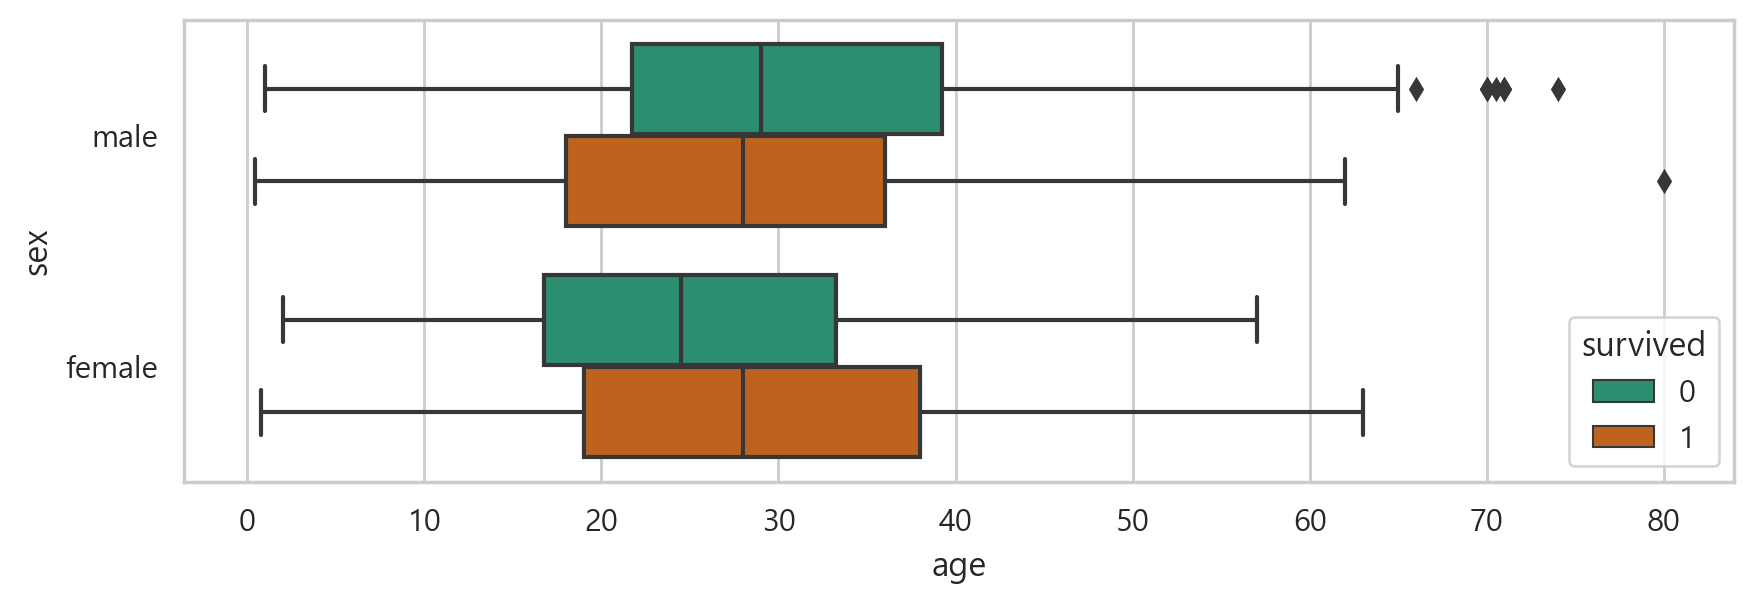

In [178]:
# boxplot
sns.boxplot(data=titanic, y='sex', x='age', hue='survived')

<Axes: xlabel='age', ylabel='sex'>

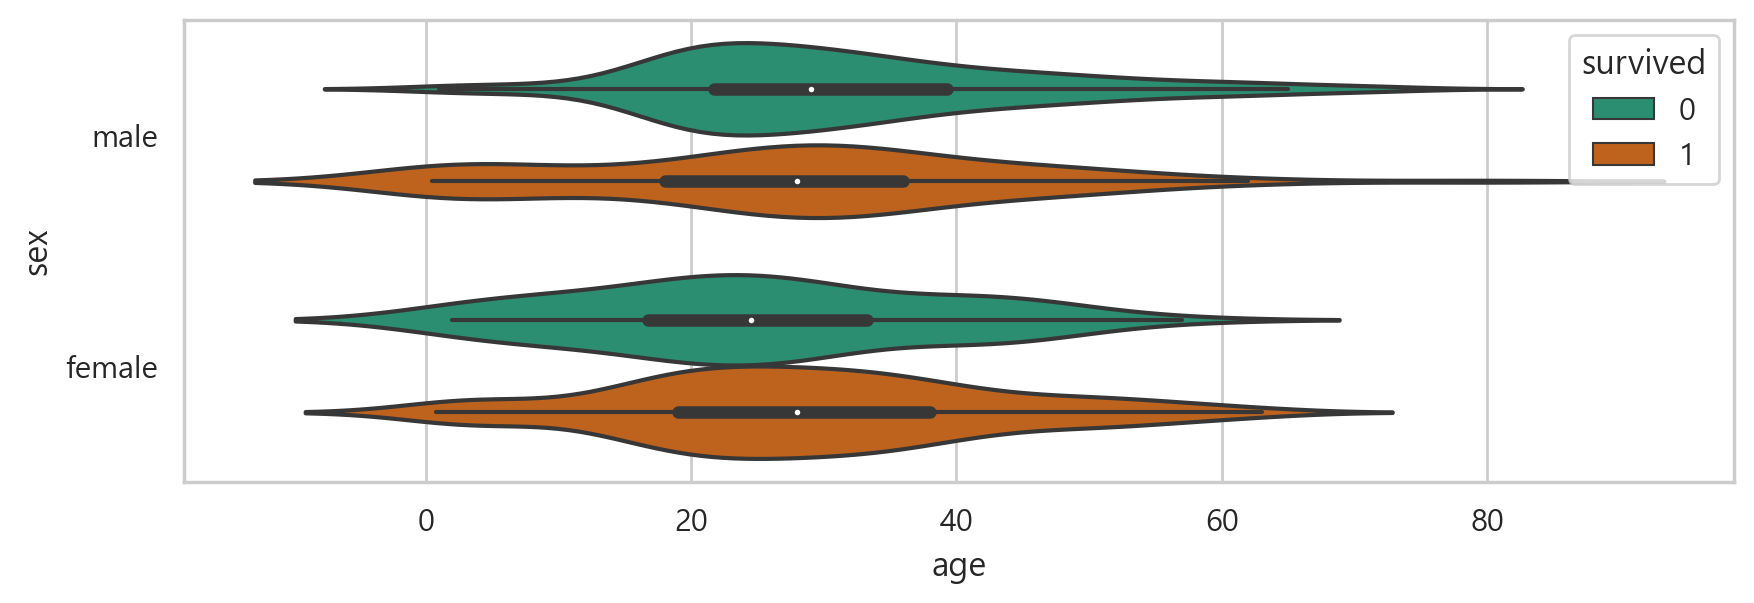

In [180]:
# violinplot
sns.violinplot(data=titanic, y='sex', x='age', hue='survived')

<Axes: xlabel='sex', ylabel='age'>

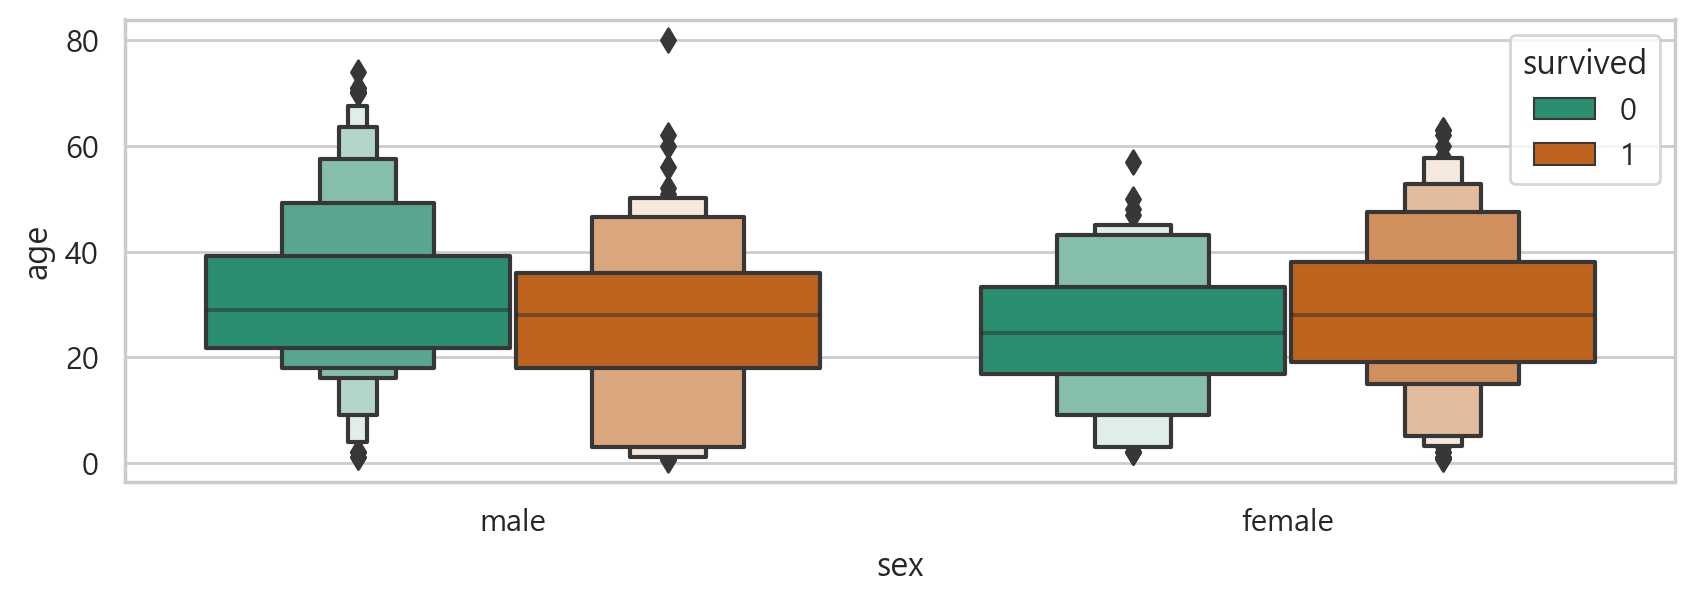

In [181]:
# boxenplot : box플롯 + 분포
sns.boxenplot(data=titanic, x='sex', y='age', hue='survived')

### 3) 쌍관계 그래프
- pairplot : 데이터프레임에 포함된 모든 수치형 변수 쌍에 대해 산점도(scatter)와 히스토그램

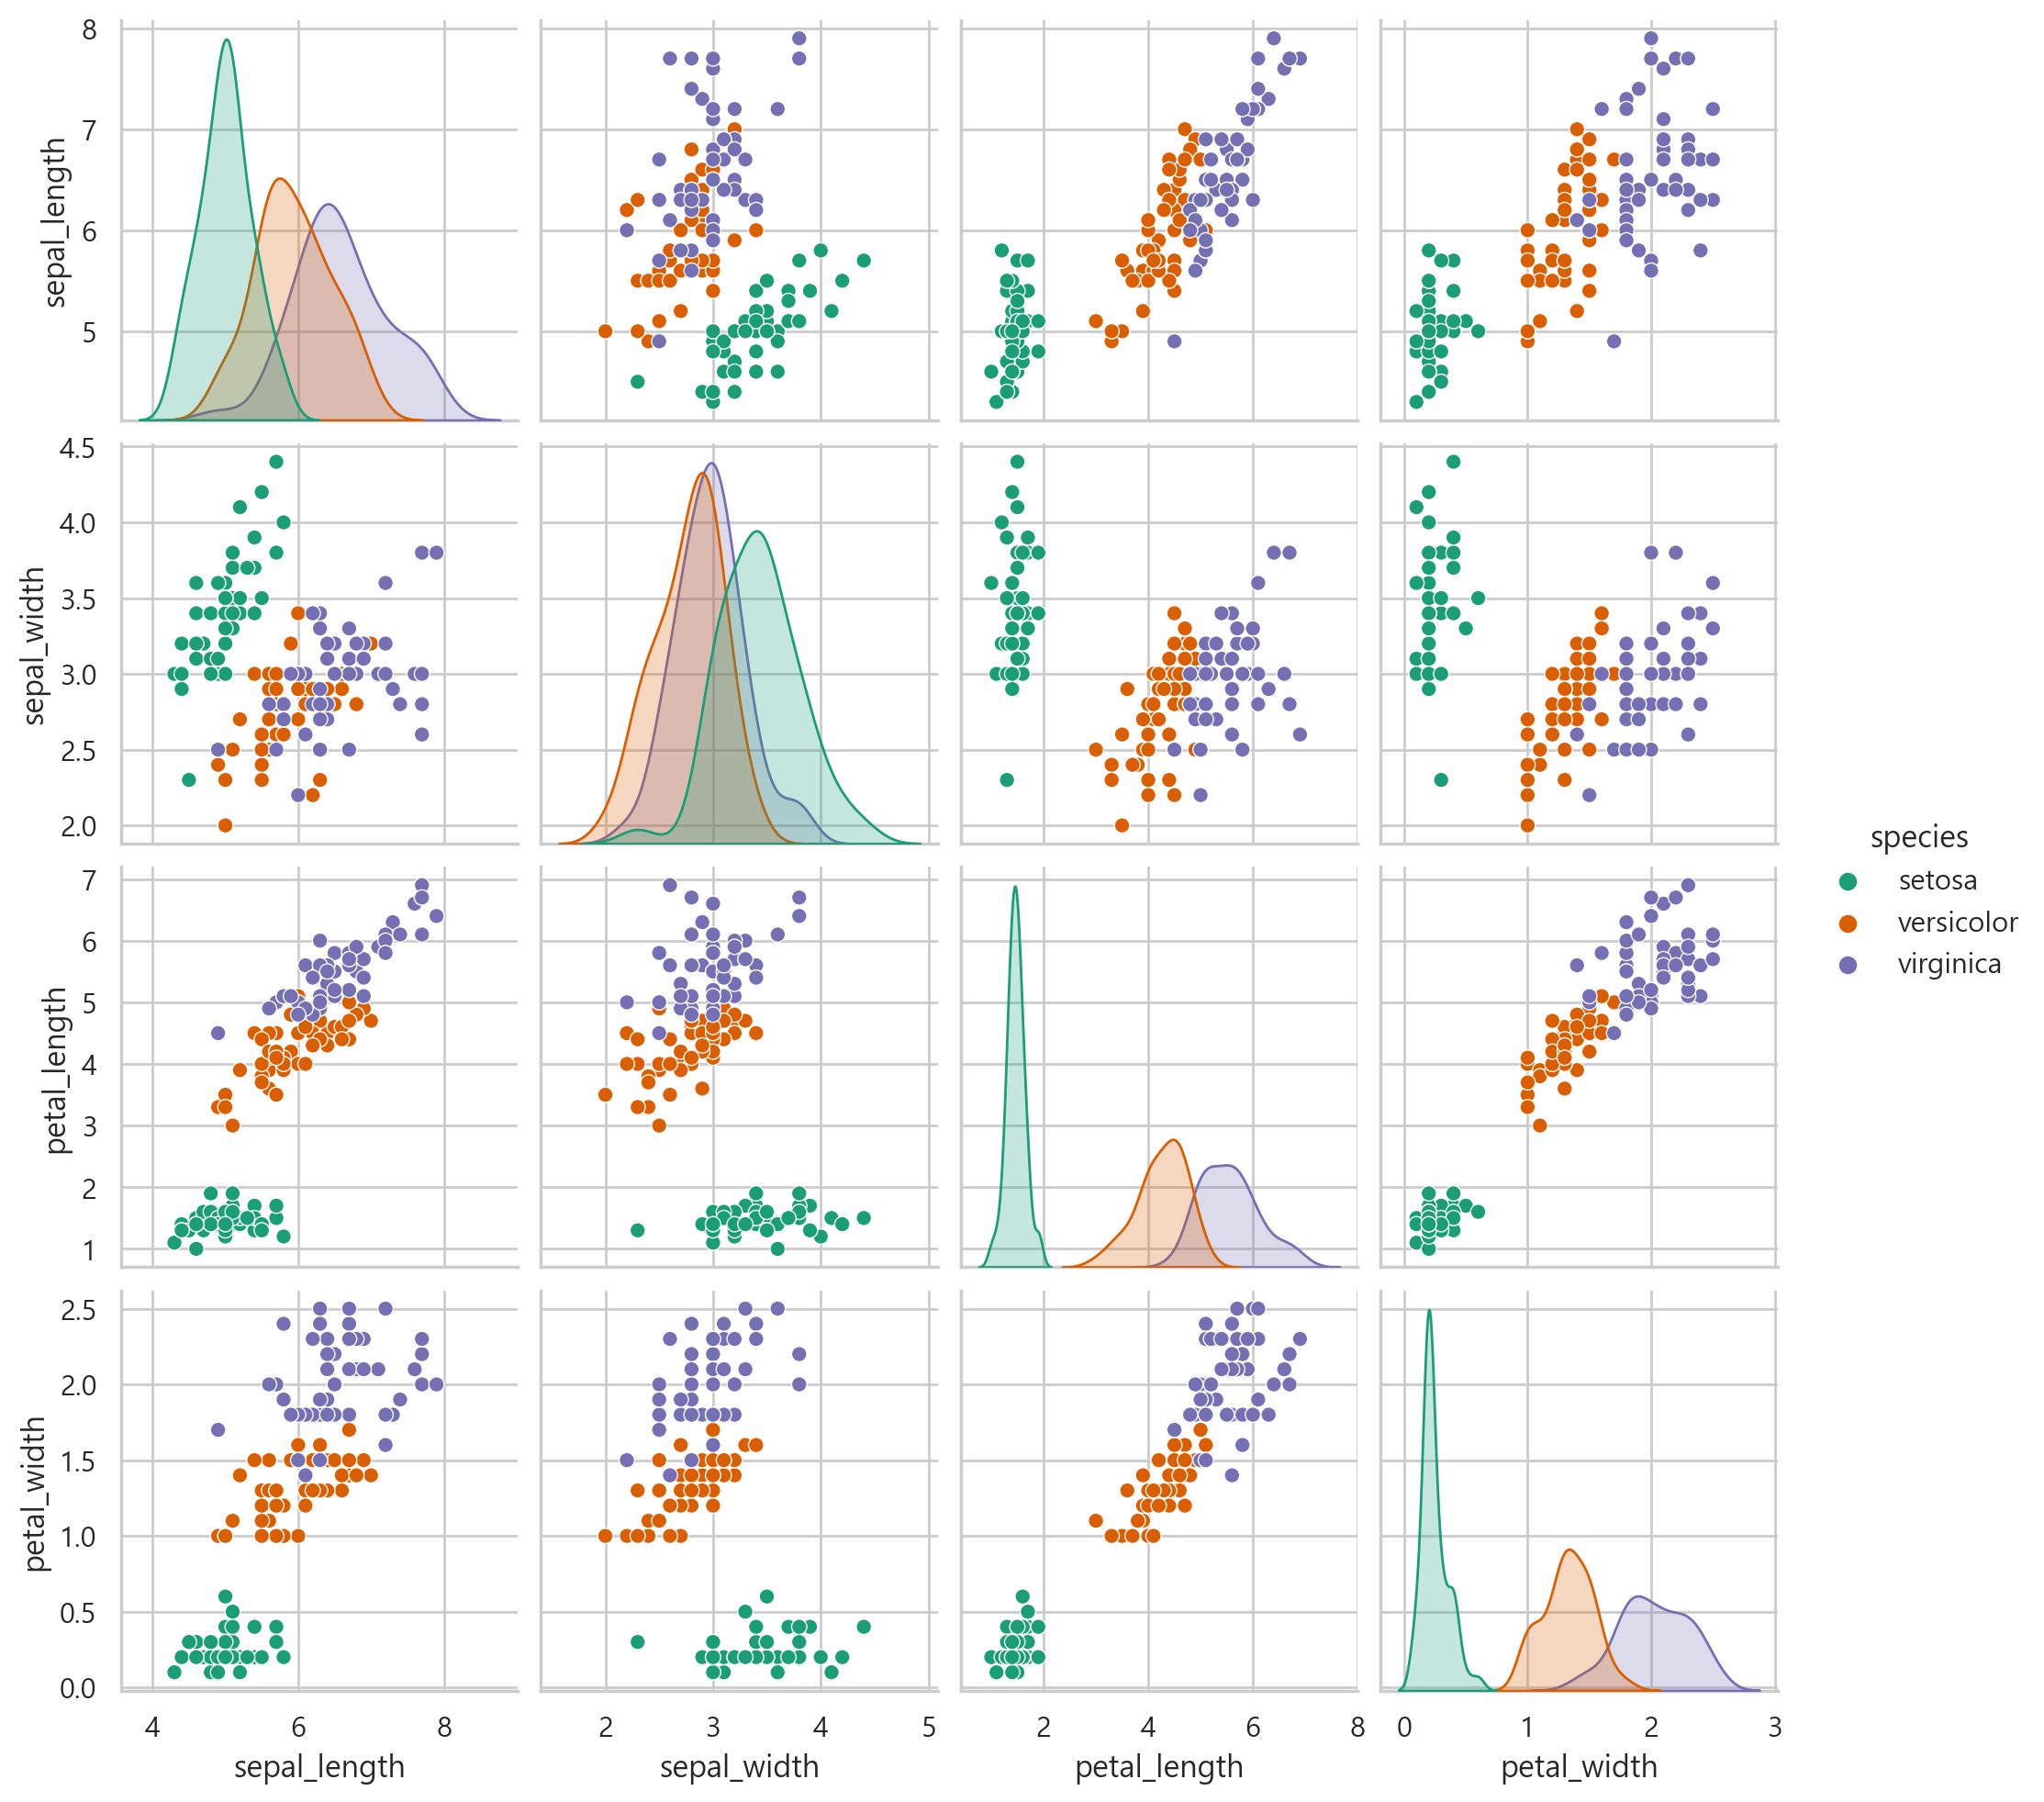

In [185]:
sns.pairplot(data=iris, hue='species')
plt.show()

### 4) 밀도 그래프

In [194]:
import numpy as np
x = np.random.randn(10000) # 평균 0, 표준편차 1인 정규분포로 10000개 1차원 배열

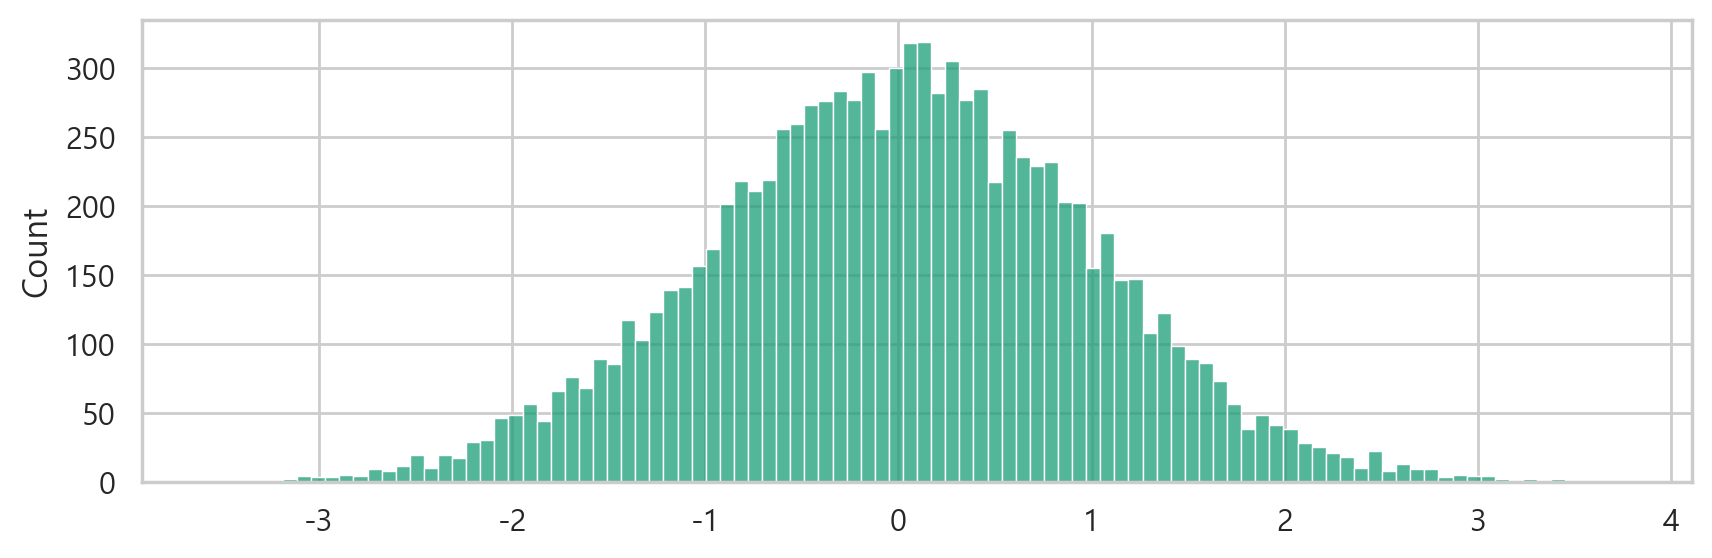

In [199]:
sns.histplot(x, bins=100)
plt.show()

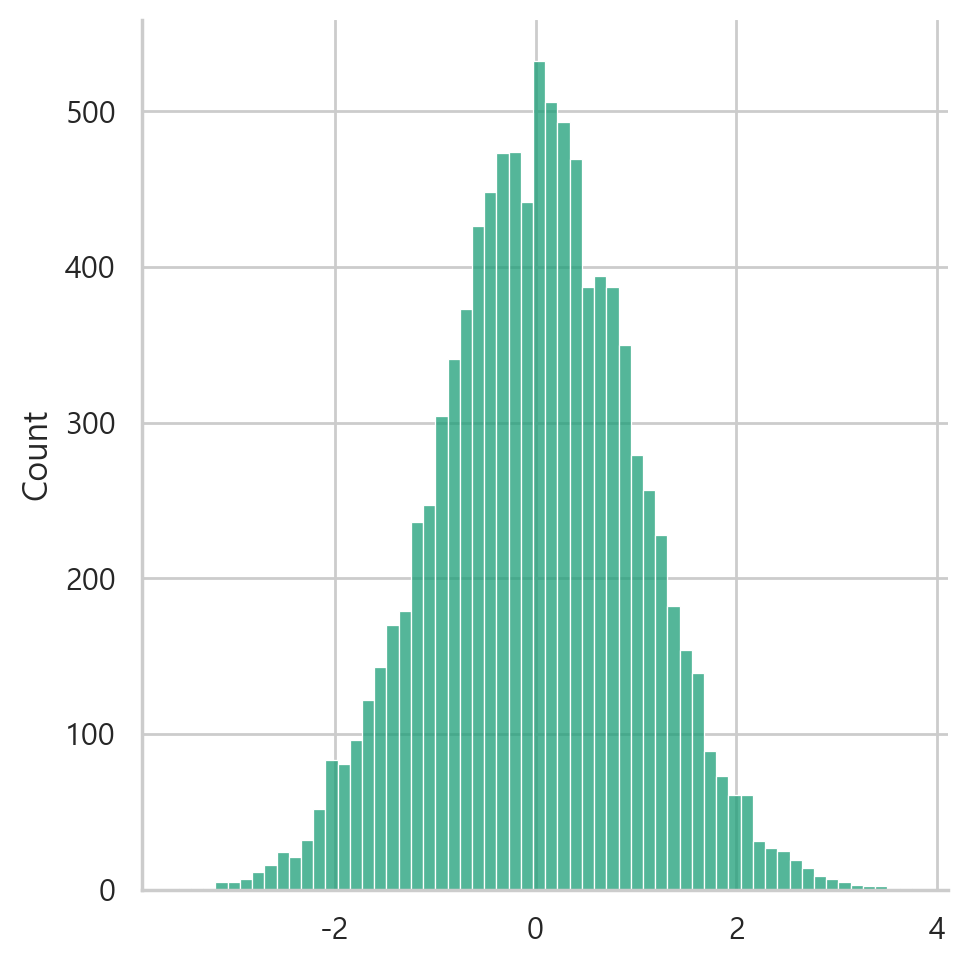

In [200]:
sns.displot(x)

### 5) 회귀 그래프

In [201]:
corr = iris.corr(numeric_only=True)
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


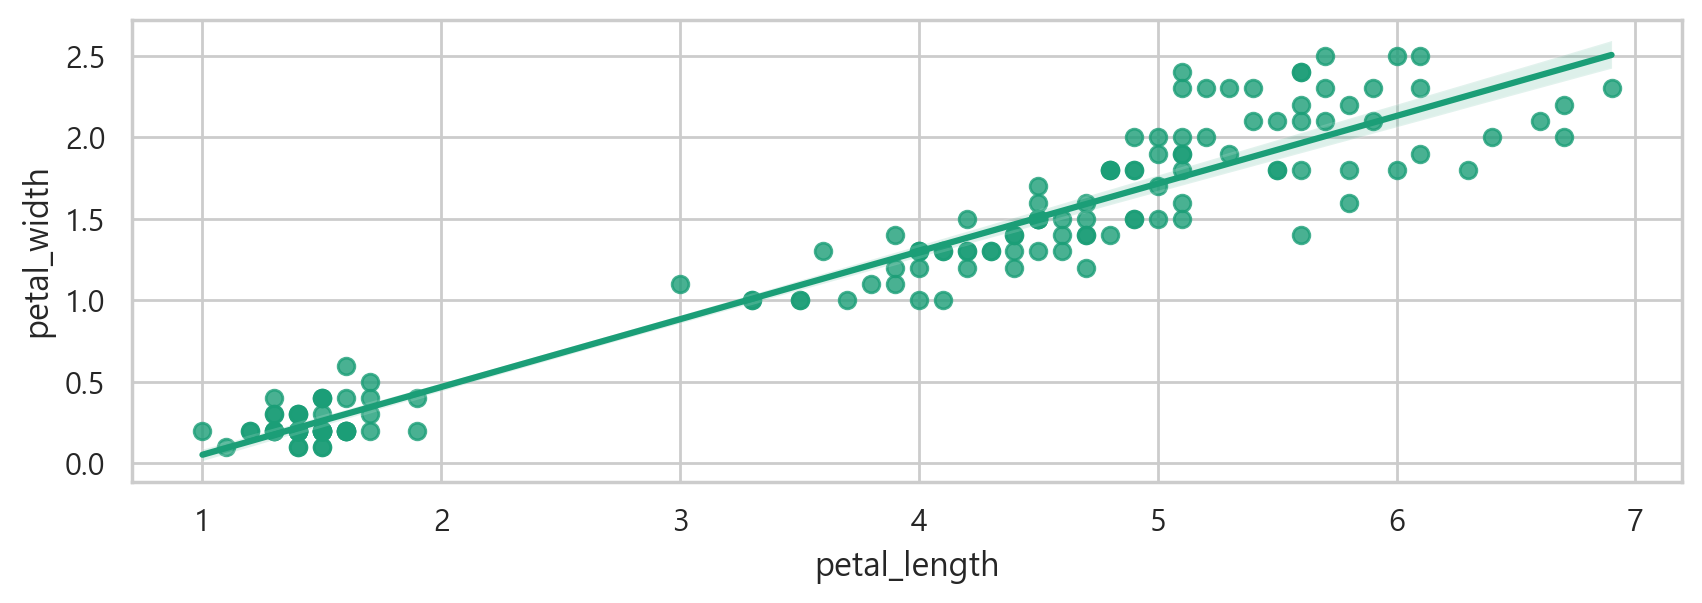

In [207]:
# 회귀 그래프 : regplot(hue 사용 불가), lmplot(hue 사용 가능)
sns.regplot(data=iris, x='petal_length', y='petal_width')
plt.show()

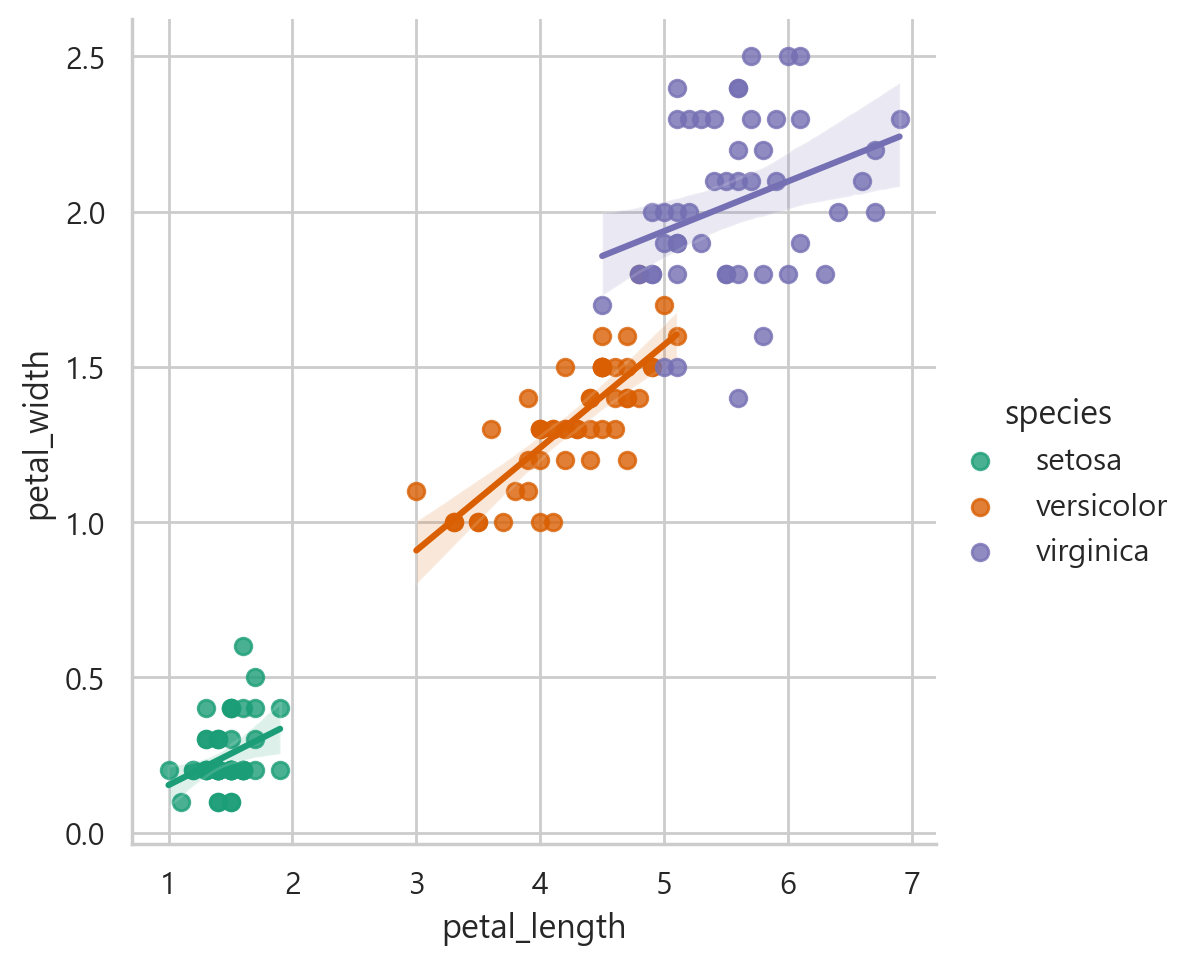

In [208]:
# 종별 회귀그래프
sns.lmplot(data=iris, x='petal_length', y='petal_width',
          hue='species')
plt.show()

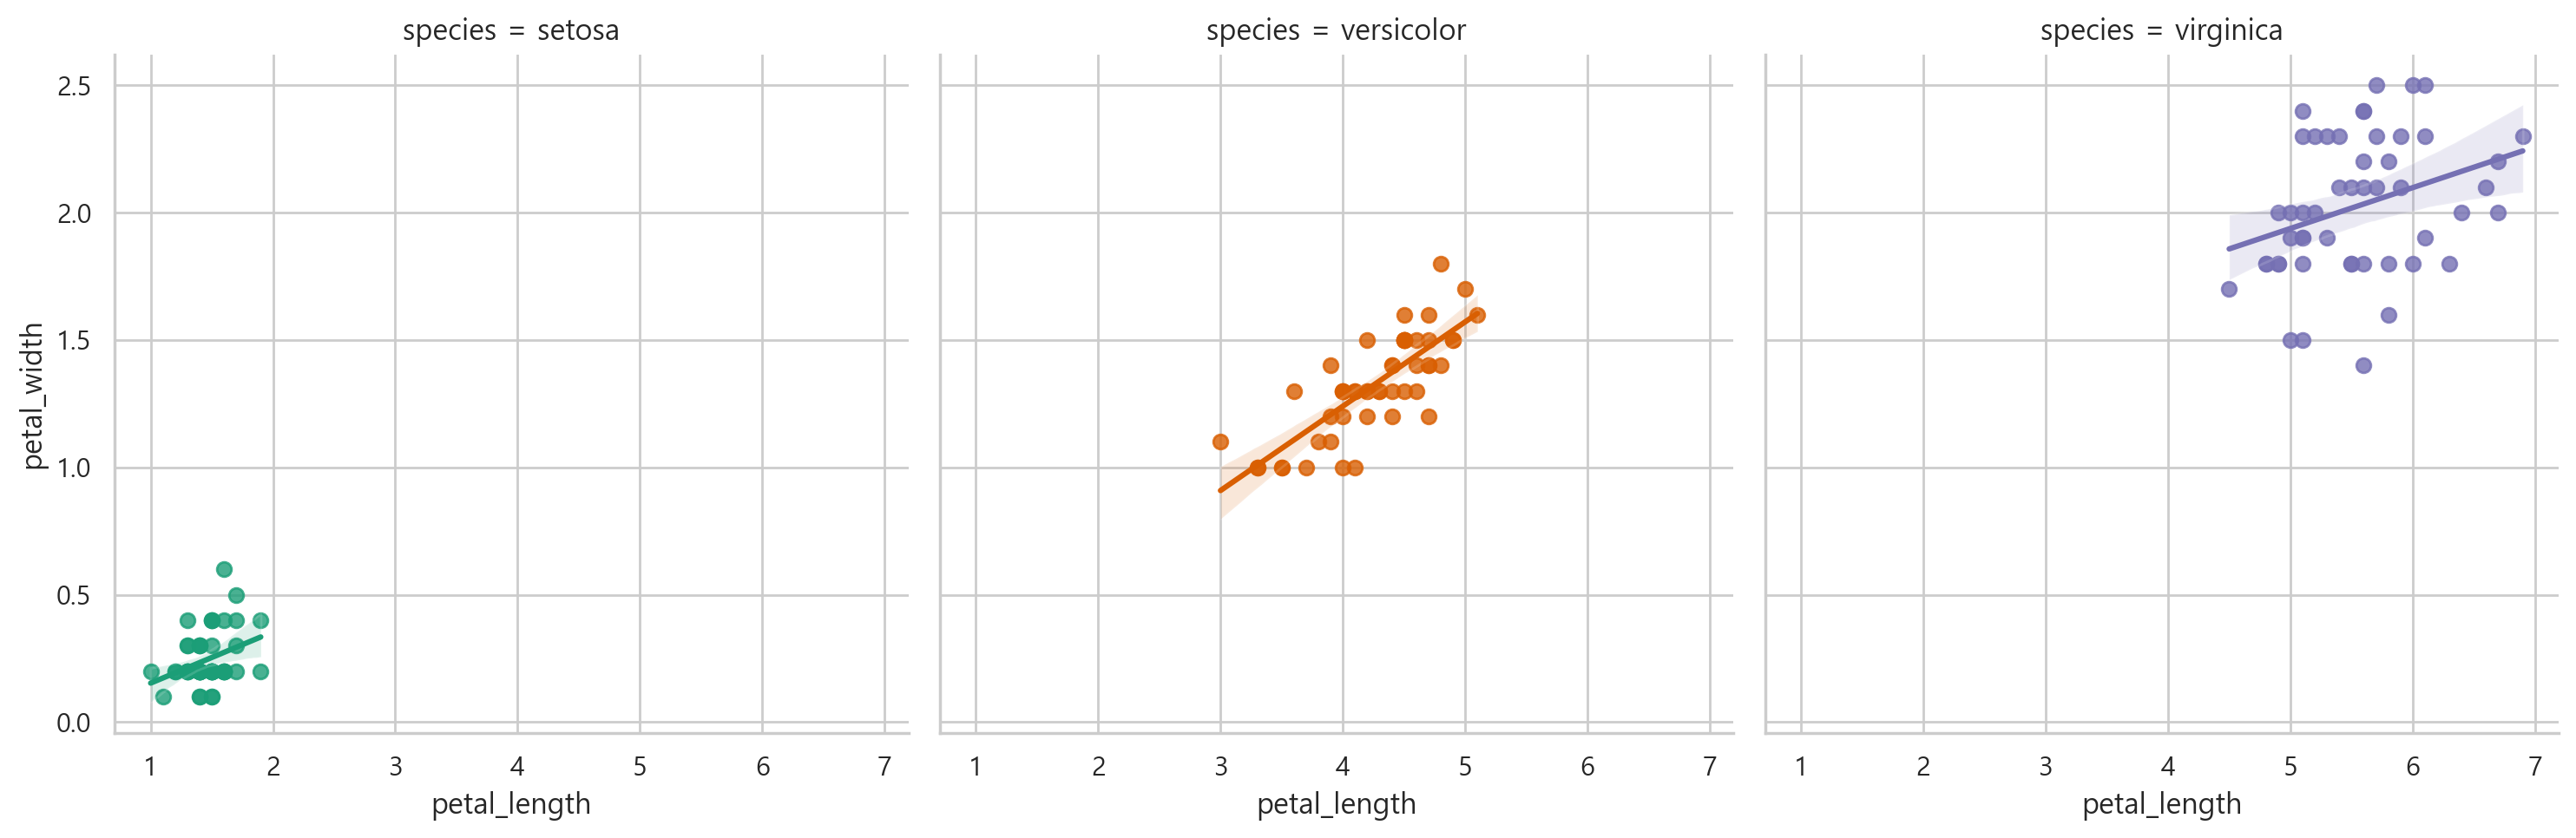

In [210]:
# 종별 회귀그래프
sns.lmplot(data=iris, x='petal_length', y='petal_width',
          hue='species',
          col='species'
          )
plt.show()

## 2.4 다중그래프를 위한 FacetGrid
- https://seaborn.pydata.org/tutorial/axis_grids.html#conditional-small-multiples(교안 73page)

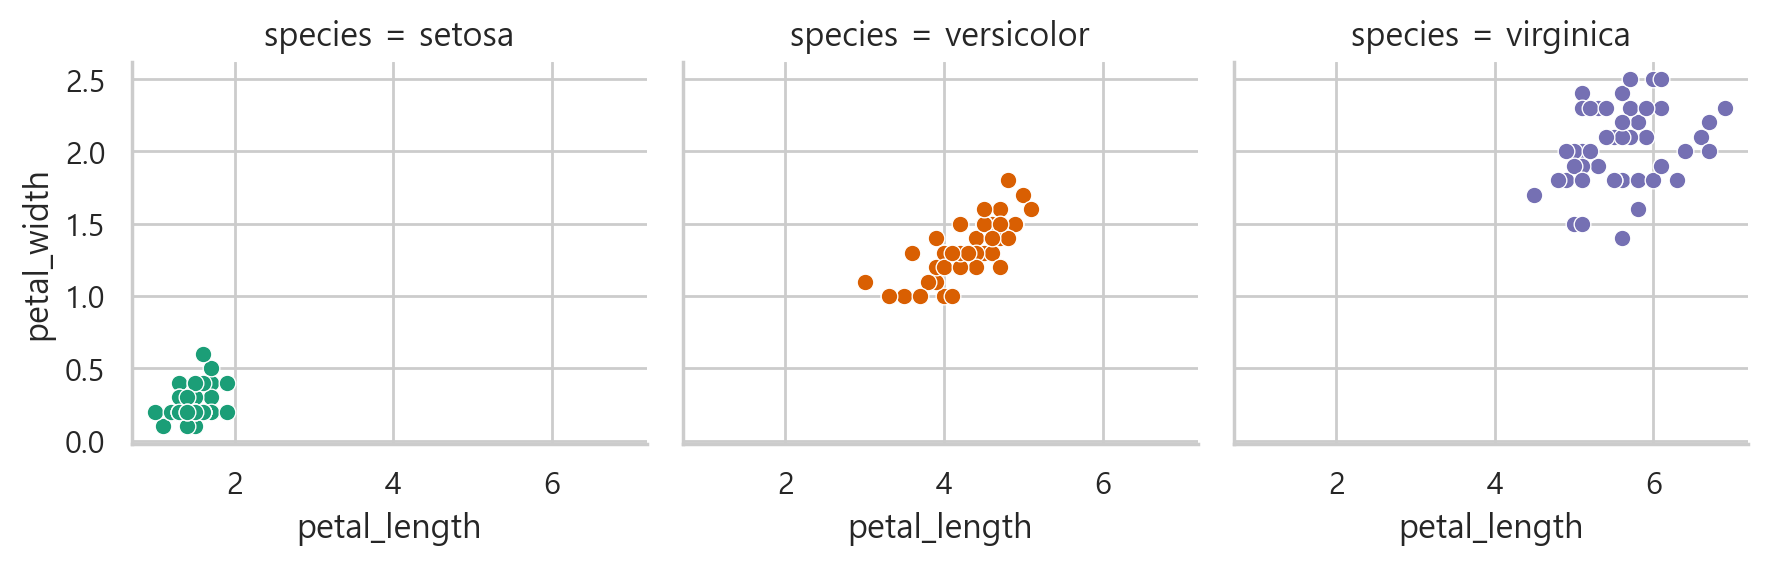

In [211]:
g = sns.FacetGrid(iris, col='species', hue='species')
g.map(sns.scatterplot, 'petal_length', 'petal_width')
plt.show()

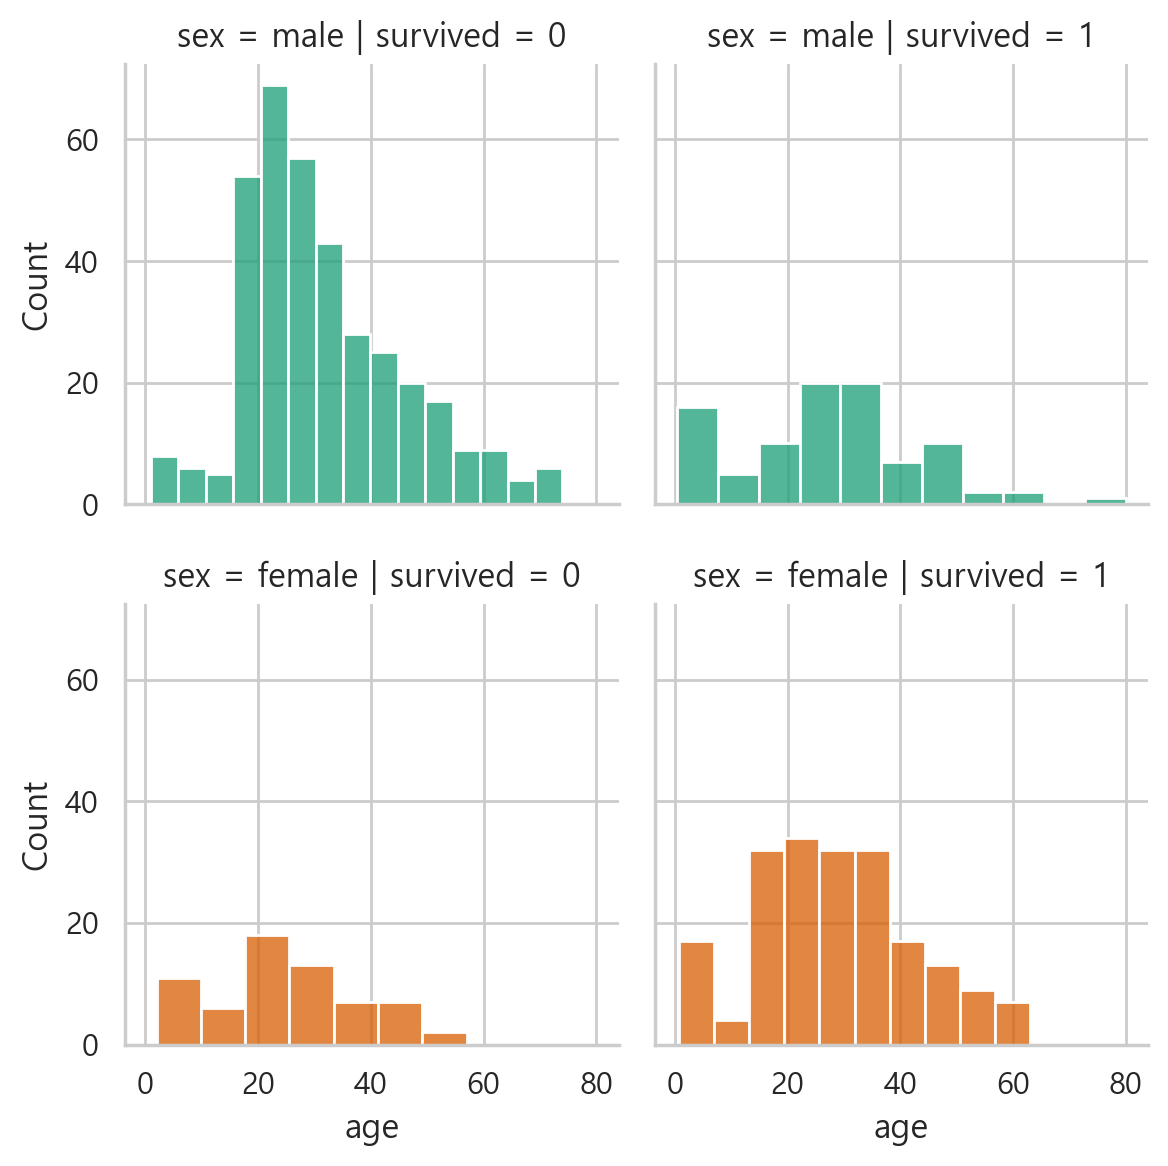

In [215]:
g = sns.FacetGrid(titanic, col='survived', hue='sex', row='sex')
g.map(sns.histplot, 'age')
plt.show()